In [2]:
import os
import geopandas as gpd
import pandas as pd
import sys

# Add project root to Python path
project_root = "/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work"
if project_root not in sys.path:
    sys.path.append(project_root)

from geofunctions import utils
import matplotlib.pyplot as plt

# Description

This notebook analyses the result of running 020-process-dwells/003-remote-work-monthly.py for each month. In reality this only included individuals with office location signals during the month which implies hybrid scedule rather than completely remote

In [5]:
months = utils.return_list_months_ok()

In [7]:
list_months = []
for MONTH in months:
    print(MONTH)
    try:
        df_part = pd.read_csv(
            utils.get_path(
                "processed", "dwells", f"remote_work/user_remote_work_{MONTH}.csv"
            )
        )
        list_months.append(df_part)
    except:
        pass

201901
201904
201907
201908
201909
201910
201911
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [8]:
df_shares = pd.concat(list_months)

In [1]:
df_shares.head()

NameError: name 'df_shares' is not defined

In [10]:
df_shares["month"] = df_shares["month"].astype(str)

In [11]:
import gc

gc.collect()

1498

In [12]:
import numpy as np


df_shares[df_shares.share_remote_work_comparison_days != np.inf].groupby("month")[
    ["share_remote_work_comparison_days", "share_remote_work_min_prob_days"]
].mean()

,share_remote_work_comparison_days,share_remote_work_min_prob_days
month,,
201901,0.236479,0.266686
201904,0.237931,0.248902
201907,0.193152,0.184791
201908,0.181358,0.177115
201909,0.214671,0.203279
201911,0.166132,0.161020
202001,0.251741,0.288014
202002,0.208392,0.227651
202003,0.267566,0.281368


In [13]:
# Group data and calculate the mean for the specified columns
df_grouped = (
    df_shares[df_shares.share_remote_work_comparison_days != np.inf]
    .groupby(["month", "identifier_type"])[
        ["share_remote_work_comparison_days", "share_remote_work_min_prob_days"]
    ]
    .mean()
)

In [16]:
df_grouped = df_grouped.reset_index()

In [ ]:
df_grouped_gaid = df_grouped[df_grouped.identifier_type == "GAID"]

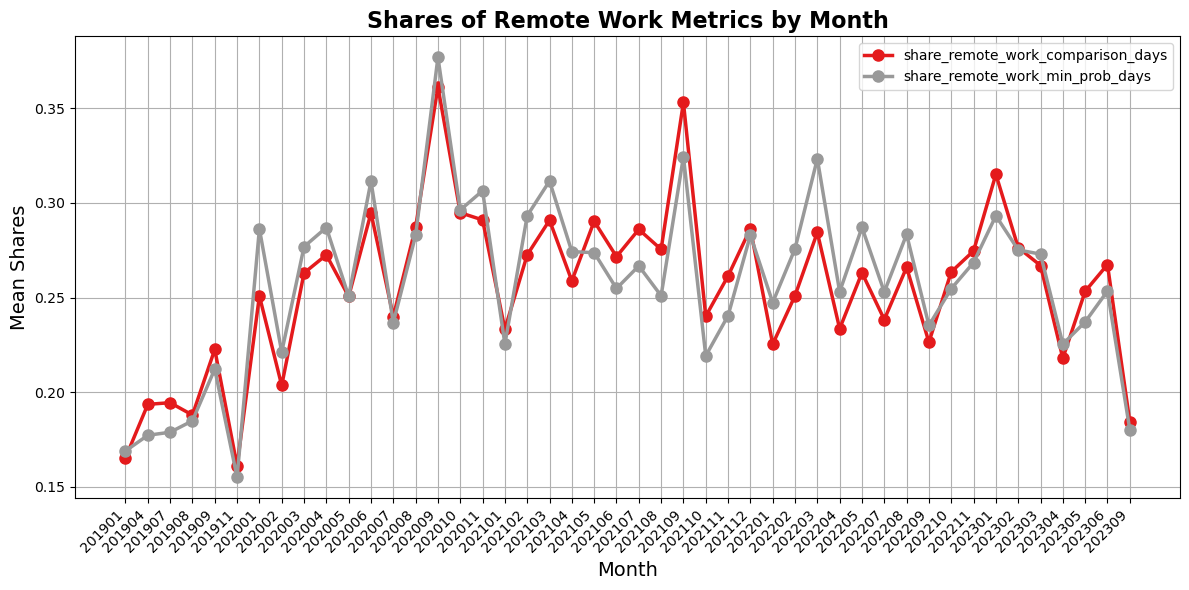

In [36]:
import matplotlib.pyplot as plt


# Set up the plot figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Create a larger figure for clarity

# Plot the data
df_grouped_gaid.set_index("month")[
    ["share_remote_work_comparison_days", "share_remote_work_min_prob_days"]
].plot(
    ax=ax,
    kind="line",
    linewidth=2.5,  # Thicker lines for better visibility
    marker="o",  # Add markers for data points
    markersize=8,  # Larger markers
    colormap="Set1",  # Use a vibrant colormap
    grid=True,  # Add gridlines for clarity
)

# Customize the title and labels
ax.set_title("Shares of Remote Work Metrics by Month", fontsize=16, weight="bold")
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Mean Shares", fontsize=14)

# # Set custom x-tick labels and font size
ax.set_xticks(range(len(df_grouped_gaid["month"])))
ax.set_xticklabels(df_grouped_gaid["month"], rotation=45, ha="right", fontsize=10)

# # Add a legend with a title and improved placement
# # ax.legend(
# #     title="Metrics",
# #     fontsize=12,
# #     title_fontsize=12,
# #     loc="upper left",
# #     bbox_to_anchor=(-1.02, 1),
# # )

# # Add gridlines with custom styling
# ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_grouped_gaid = df_grouped_gaid.set_index("month")

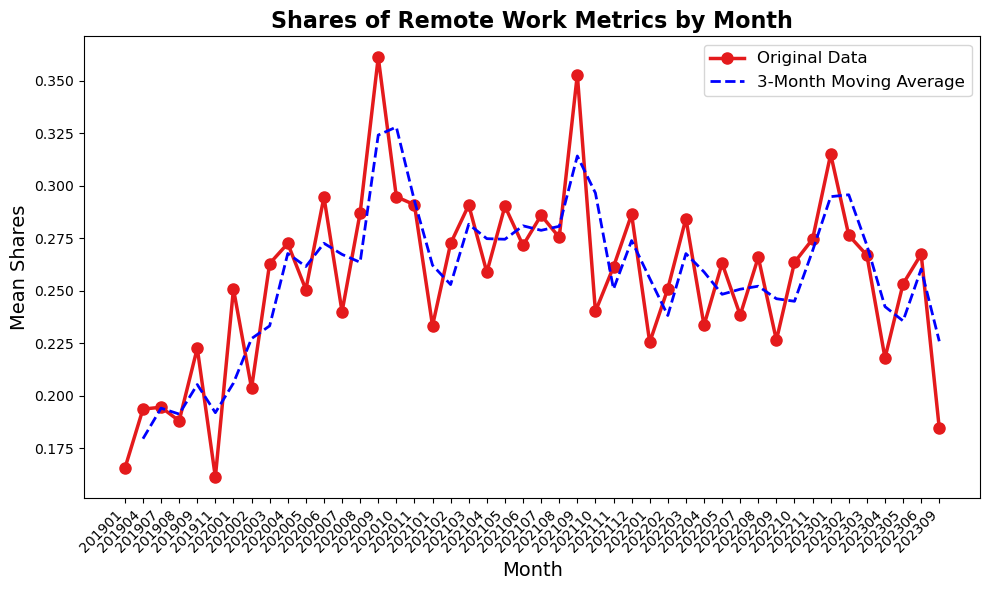

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_grouped_gaid' is your DataFrame and 'month' is the time index
# Compute the 3-period moving average
#
df_grouped_gaid["moving_average"] = (
    df_grouped_gaid["share_remote_work_comparison_days"].rolling(window=2).mean()
)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped_gaid["share_remote_work_comparison_days"].plot(
    ax=ax,
    kind="line",
    linewidth=2.5,  # Thicker lines for better visibility
    marker="o",  # Add markers for data points
    markersize=8,  # Larger markers
    colormap="Set1",  # Use a vibrant colormap
    grid=True,  # Add gridlines for clarity
    label="Original Data",
)

# Plot the moving average
df_grouped_gaid["moving_average"].plot(
    ax=ax,
    kind="line",
    linewidth=2,  # Slightly thinner line for moving average
    linestyle="--",  # Dashed line for distinction
    color="blue",  # Use a distinct color
    label="3-Month Moving Average",
)

# Add titles, labels, and legend
# Customize the title and labels
ax.set_title("Shares of Remote Work Metrics by Month", fontsize=16, weight="bold")
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Mean Shares", fontsize=14)

# # Set custom x-tick labels and font size
ax.set_xticks(range(len(df_grouped_gaid.index)))
ax.set_xticklabels(df_grouped_gaid.index, rotation=45, ha="right", fontsize=10)
ax.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

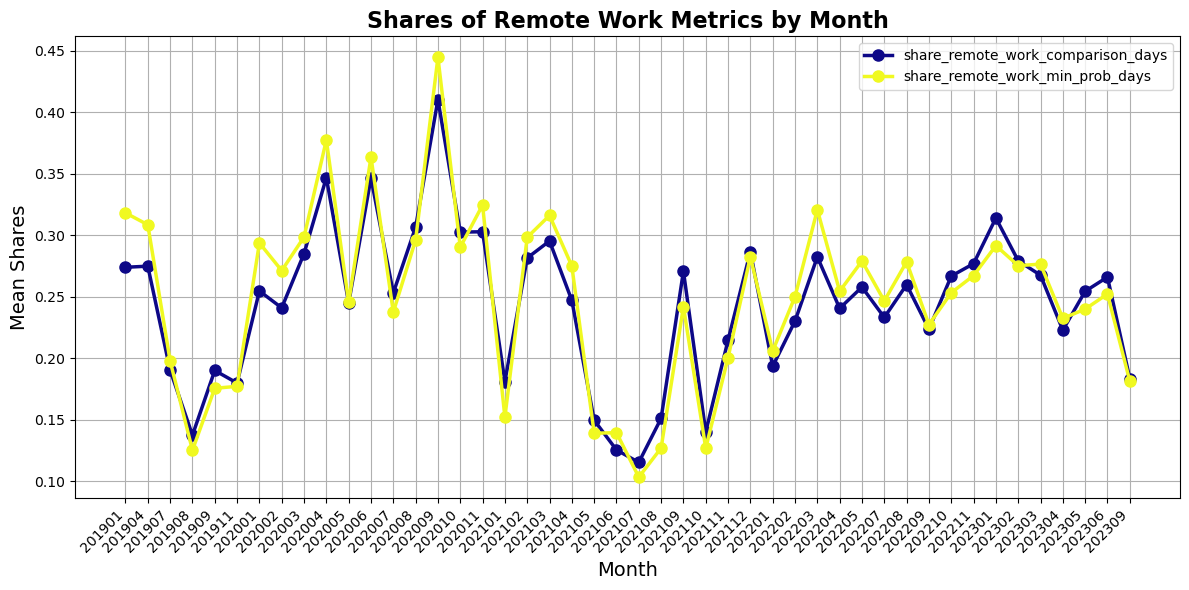

In [ ]:
import matplotlib.pyplot as plt

df_grouped_idfa = df_grouped[df_grouped.identifier_type == "IDFA"]

# Set up the plot figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Create a larger figure for clarity

# Plot the data
df_grouped_idfa.set_index("month").plot(
    ax=ax,
    kind="line",
    linewidth=2.5,  # Thicker lines for better visibility
    marker="o",  # Add markers for data points
    markersize=8,  # Larger markers
    colormap="plasma",  # Use a vibrant colormap
    grid=True,  # Add gridlines for clarity
)

# Customize the title and labels
ax.set_title("Shares of Remote Work Metrics by Month", fontsize=16, weight="bold")
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Mean Shares", fontsize=14)

# # Set custom x-tick labels and font size
ax.set_xticks(range(len(df_grouped_idfa["month"])))
ax.set_xticklabels(df_grouped_idfa["month"], rotation=45, ha="right", fontsize=10)

# # Add a legend with a title and improved placement
# # ax.legend(
# #     title="Metrics",
# #     fontsize=12,
# #     title_fontsize=12,
# #     loc="upper left",
# #     bbox_to_anchor=(-1.02, 1),
# # )

# # Add gridlines with custom styling
# ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
list_months = []
for MONTH in [
    "201901",
    "201904",
    "201907",
    "201908",
    "201909",
    "201911",
    "201912",
] + months:
    print(MONTH)
    df_part = pd.read_csv(
        utils.get_path(
            "processed", "dwells", f"remote_work/day_types_shares_{MONTH}.csv"
        )
    )
    list_months.append(df_part)
df_dtypes = pd.concat(list_months)

201901
201904
201907
201908
201909
201911
201912
202001
202003
202004
202005
202006
202007
202008
202009
202010
202101
202104
202106
202107
202201
202203
202204
202207
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [32]:
df_dtypes.shape

(99, 5)

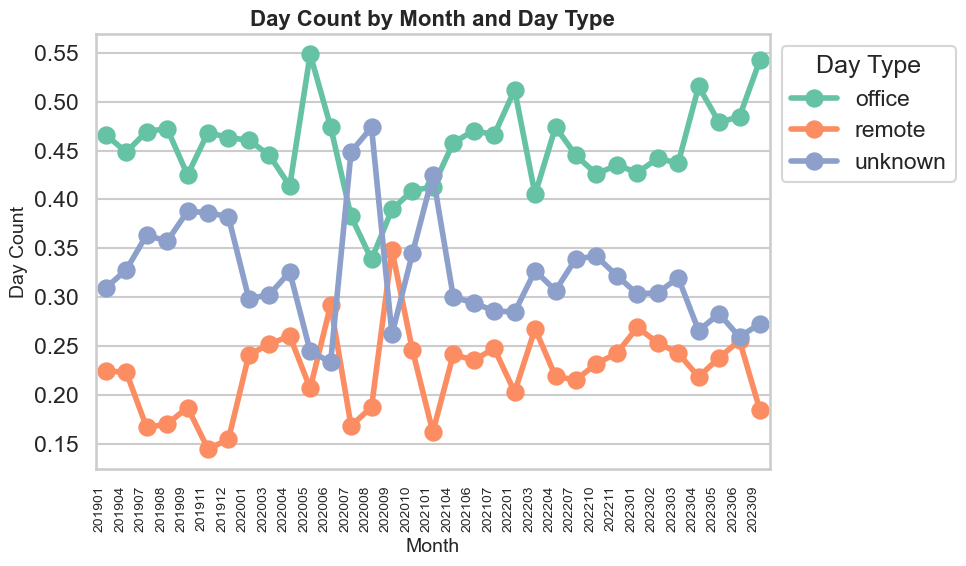

In [ ]:
import seaborn as sn

# Set the style and context
sn.set_theme(style="whitegrid", context="talk")


# Create the point plot with enhancements
plt.figure(figsize=(10, 6))
plot = sn.pointplot(
    data=df_dtypes,
    x="month",
    y="share_of_day_counts",
    hue="day_type",
    palette="Set2",  # Vibrant color palette
)

# Customize labels and title
plot.set_title("Day Count by Month and Day Type", fontsize=16, weight="bold")
plot.set_xlabel("Month", fontsize=14)
plot.set_ylabel("Day Count", fontsize=14)

# Rotate x-axis labels for better readability
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation="vertical",
    horizontalalignment="right",
    fontsize=10,
)

# Add legend and improve its placement
plot.legend(title="Day Type", loc="upper left", bbox_to_anchor=(1, 1))


# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
bad_months = df_dtypes[
    (df_dtypes.day_type == "unknown") & (df_dtypes["share_of_day_counts"] > 0.4)
]["month"]

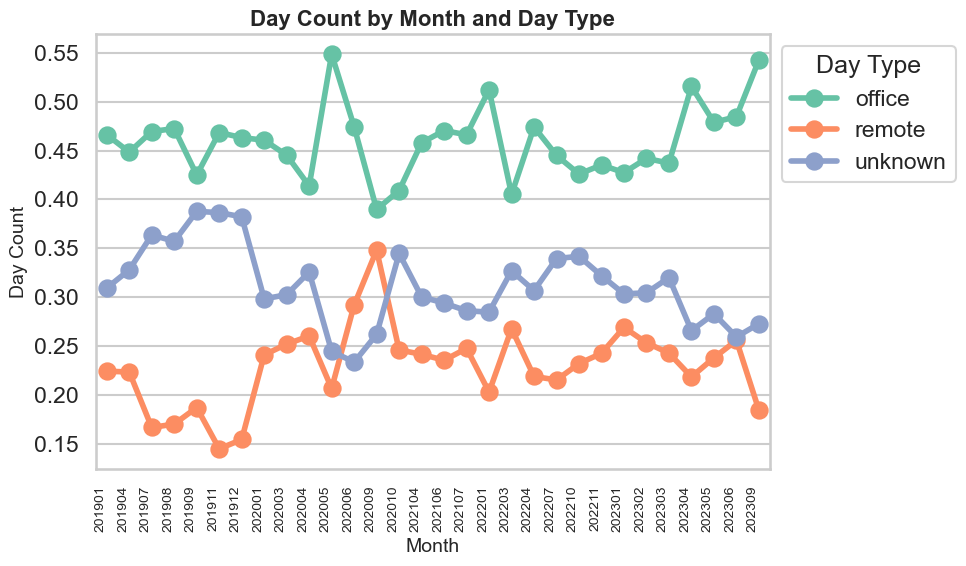

In [ ]:
import seaborn as sn

# Set the style and context
sn.set_theme(style="whitegrid", context="talk")


# Create the point plot with enhancements
plt.figure(figsize=(10, 6))
plot = sn.pointplot(
    data=df_dtypes[~df_dtypes.month.isin(bad_months)],
    x="month",
    y="share_of_day_counts",
    hue="day_type",
    palette="Set2",  # Vibrant color palette
)

# Customize labels and title
plot.set_title("Day Count by Month and Day Type", fontsize=16, weight="bold")
plot.set_xlabel("Month", fontsize=14)
plot.set_ylabel("Day Count", fontsize=14)

# Rotate x-axis labels for better readability
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation="vertical",
    horizontalalignment="right",
    fontsize=10,
)

# Add legend and improve its placement
plot.legend(title="Day Type", loc="upper left", bbox_to_anchor=(1, 1))


# Display the plot
plt.tight_layout()
plt.show()

# Aggregate by statistical area and save

In [46]:
geohash_stat_area = gpd.read_file(
    utils.get_path("processed", "adm", "geohash_stat_area_pairs.geojson")
)

In [25]:
geohash_stat_area.head()

,geohash,index_right,OBJECTID,SHEM_YISHUV_HEB,SHEM_YISHUV_ENG,SEMEL_YISHUV,YISHUV_STAT_2022,STAT_2022,Stat2022_Unite,Stat2022_Ref,Main_Function_Code,Main_Function_Txt,ROVA,TAT_ROVA,geometry
0,swnt5jy,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66049 31.7807, 34.66049 31.78207,..."
1,swnt5tz,10,76,אשדוד,ASHDOD,70,700142,142.0,142,NaN,1.0,מגורים,1.0,14.0,"POLYGON ((34.66049 31.80405, 34.66049 31.80542..."
2,swnt5nn,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66187 31.7807, 34.66187 31.78207,..."
3,swnt5np,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66187 31.78207, 34.66187 31.78345..."
4,swnt5q0,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66187 31.78345, 34.66187 31.78482..."


In [47]:
df_shares = df_shares.merge(
    geohash_stat_area[["YISHUV_STAT_2022", "geohash"]],
    left_on="geohash_home",
    right_on="geohash",
    how="inner",
)

In [48]:
df_shares.columns

Index(['identifier', 'identifier_type', 'month', 'geohash_home',
       'geohash_work', 'flag_remote_work_min_prob', 'remote_work_probability',
       'flag_remote_work_comparison', 'share_remote_work_comparison_days',
       'share_remote_work_min_prob_days', 'YISHUV_STAT_2022', 'geohash'],
      dtype='object')

In [ ]:
# Test us

In [ ]:
users_201901 = df_shares[df_shares.month == "201901"].identifier.unique()
users_months = (
    df_shares[df_shares.identifier.isin(users_201901)]
    .groupby("identifier")["month"]
    .nunique()
)
users_months[users_months > 1]

identifier
00043c1c-bb6e-434c-8848-cd5bea2161a6    2
003b6189-ca3d-46e8-91aa-f9c271a8826e    3
0052e839-ea74-4c11-9c4a-2527e12126ff    2
005aaa4a-588c-4390-bd1d-224e06e9d2d2    2
006470f5-e200-471f-aaae-a702ae1b3e7e    2
                                       ..
ff5bbf33-ab3b-4cae-b49e-3a456c0ab560    3
ff7ae039-8316-4ecc-be09-22673d093c07    8
ffbcf646-fc9d-4b6d-be87-d34ba8cc03ef    2
ffc47084-3b05-470d-a8a4-e689989ea888    2
ffcd44a8-db56-4e3c-b5de-f8bd27b14d26    2
Name: month, Length: 1199, dtype: int64

In [65]:
freq_users_homes = df_shares[
    df_shares.identifier.isin(users_months[users_months > 1].index)
]

In [67]:
freq_users_homes.sort_values(["identifier", "month"])

,identifier,identifier_type,month,geohash_home,geohash_work,flag_remote_work_min_prob,remote_work_probability,flag_remote_work_comparison,share_remote_work_comparison_days,share_remote_work_min_prob_days,YISHUV_STAT_2022,geohash
0,00043c1c-bb6e-434c-8848-cd5bea2161a6,IDFA,201901,swntzcx,swnv8zx,0.103448,0.062069,0.103448,0.136364,0.136364,83000621,swntzcx
3248,00043c1c-bb6e-434c-8848-cd5bea2161a6,IDFA,201904,swnvbdr,swnvbz0,0.192308,0.096154,0.000000,0.000000,0.333333,66000631,swnvbdr
2156,003b6189-ca3d-46e8-91aa-f9c271a8826e,GAID,201901,swntvne,swntvzw,0.238095,0.238095,0.238095,0.454545,0.454545,1470001,swntvne
31687,003b6189-ca3d-46e8-91aa-f9c271a8826e,GAID,202001,swntvne,swntytk,0.086957,0.086957,0.086957,0.166667,0.166667,1470001,swntvne
49268,003b6189-ca3d-46e8-91aa-f9c271a8826e,GAID,202003,swntvne,swntvzw,0.266667,0.266667,0.333333,0.833333,0.666667,1470001,swntvne
...,...,...,...,...,...,...,...,...,...,...,...,...
8704,ffbcf646-fc9d-4b6d-be87-d34ba8cc03ef,IDFA,201908,swnwqyg,swny81d,0.300000,0.300000,0.400000,0.666667,0.500000,70000032,swnwqyg
1084,ffc47084-3b05-470d-a8a4-e689989ea888,IDFA,201901,swntzqt,swnvbr5,0.185185,0.165741,0.185185,0.263158,0.263158,83000413,swntzqt
3961,ffc47084-3b05-470d-a8a4-e689989ea888,IDFA,201904,swntzqt,swnvbr5,0.260870,0.231884,0.260870,0.400000,0.400000,83000413,swntzqt
1085,ffcd44a8-db56-4e3c-b5de-f8bd27b14d26,IDFA,201901,swnyd0c,swny478,0.034483,0.034483,0.034483,0.055556,0.055556,79000423,swnyd0c


In [68]:
freq_users_homes.groupby(["identifier", "month"]).size()[
    freq_users_homes.groupby(["identifier", "month"]).size() > 1
]

identifier                            month 
020eb654-5257-4db3-bbd0-4f9b9e291daf  202005    2
14eea199-716c-4b2d-bac1-b4a8c126637d  202005    2
23044e8a-9b2b-4de6-aeb0-6f245c7ffc6a  202005    2
25a7bc8c-e75d-4bba-b6f9-dffb8ee667ca  202005    2
3493546d-f8cc-4667-86e3-62dcbb483e12  202005    2
4c7897c8-7907-4345-9e98-d7f5322a9a66  202005    2
4e557c0b-8fe3-4ac1-8c5b-f7869a46e598  202005    2
564afe11-87d1-4d0b-a660-8c3cf564718b  202005    2
59d676ca-9ad3-4510-9b43-ca4cf836ef19  202005    2
69bd17ef-08b4-4d56-80df-acfe32b9842b  202005    2
7caf04d7-cbdd-4ffd-a263-cf41d5eec6ad  202005    2
8d7c0ef4-52d9-44fa-bad0-c2c308414934  202005    2
a6b8ddf6-39b3-4c27-87a2-53cd177640da  202005    2
a6f1ebd2-8c45-4960-af16-0ae42945dfa6  202005    2
aa4c5c2c-786b-40ed-a64d-fa9c20efbacb  202005    2
b6d65e26-f90d-45d4-853a-509035977e9f  202005    2
c26433ac-824a-40b0-9ebd-ff97fafba32c  202005    2
ceed8472-43a8-4063-8585-0af69c632db7  202005    2
def6adc9-8f22-4bdb-9f07-fe37ea3f85ce  202005    2
e404a

In [69]:
freq_users_homes[freq_users_homes.identifier == "020eb654-5257-4db3-bbd0-4f9b9e291daf"]

,identifier,identifier_type,month,geohash_home,geohash_work,flag_remote_work_min_prob,remote_work_probability,flag_remote_work_comparison,share_remote_work_comparison_days,share_remote_work_min_prob_days,YISHUV_STAT_2022,geohash
2139,020eb654-5257-4db3-bbd0-4f9b9e291daf,IDFA,201901,swny1sz,swny4yf,0.312500,0.300000,0.312500,0.384615,0.384615,86000313,swny1sz
7205,020eb654-5257-4db3-bbd0-4f9b9e291daf,IDFA,201907,swny1sz,swny4yf,0.000000,0.000000,0.000000,0.000000,0.000000,86000313,swny1sz
31459,020eb654-5257-4db3-bbd0-4f9b9e291daf,IDFA,202001,swny1sz,swny13r,0.413793,0.393678,0.379310,0.500000,0.545455,86000313,swny1sz
49217,020eb654-5257-4db3-bbd0-4f9b9e291daf,IDFA,202003,swny1sz,swny41g,0.608696,0.405797,0.217391,0.250000,0.700000,86000313,swny1sz
64426,020eb654-5257-4db3-bbd0-4f9b9e291daf,GAID,202005,swny1sz,swnvf1y,0.000000,0.000000,0.000000,NaN,NaN,86000313,swny1sz
64427,020eb654-5257-4db3-bbd0-4f9b9e291daf,IDFA,202005,swny1sz,swnvf1y,0.636364,0.613636,0.681818,0.882353,0.823529,86000313,swny1sz
89196,020eb654-5257-4db3-bbd0-4f9b9e291daf,IDFA,202006,swny1sz,swnvfwr,0.285714,0.285714,0.285714,0.400000,0.400000,86000313,swny1sz


In [72]:
df_shares.groupby(["identifier", "month"]).size()[
    df_shares.groupby(["identifier", "month"]).size() > 1
].reset_index().month.value_counts()

month
202005    1622
202211       4
202306       2
202304       2
202109       2
201907       1
202110       1
202108       1
202209       1
Name: count, dtype: int64

In [75]:
df_shares.month.value_counts().loc["202005"]

np.int64(18019)

In [78]:
df_shares.merge(
    df_shares.groupby(["identifier", "month"])
    .size()[df_shares.groupby(["identifier", "month"]).size() > 1]
    .reset_index(),
    on=["identifier", "month"],
)

,identifier,identifier_type,month,geohash_home,geohash_work,flag_remote_work_min_prob,remote_work_probability,flag_remote_work_comparison,share_remote_work_comparison_days,share_remote_work_min_prob_days,YISHUV_STAT_2022,geohash,0
0,1a923927-3831-42c9-97fc-dbde80e2c910,IDFA,201907,swnykq2,swnyk73,0.00,0.000000,0.000000,0.000000,0.000000,87000014,swnykq2,2
1,1a923927-3831-42c9-97fc-dbde80e2c910,GAID,201907,swnykq2,swnyk73,0.25,0.126389,0.041667,0.076923,0.461538,87000014,swnykq2,2
2,ab650ce9-167a-4241-964d-8436204c3198,GAID,202005,swny36p,swnvcez,0.00,0.000000,0.000000,NaN,NaN,26200021,swny36p,2
3,ab650ce9-167a-4241-964d-8436204c3198,IDFA,202005,swny36p,swnvcez,0.25,0.250000,0.250000,0.333333,0.333333,26200021,swny36p,2
4,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,GAID,202005,swnte80,swnwxgt,0.00,0.000000,0.000000,NaN,NaN,1660002,swnte80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,48294c6e-b75a-4c6a-9878-5e4049043117,IDFA,202304,swnv8ke,swnv8ty,0.50,0.500000,0.500000,0.500000,0.500000,62000232,swnv8ke,2
3268,1a726552-cb8d-4d3b-81bf-75241e54e1f7,GAID,202306,swnv8k3,swny5q4,0.00,0.000000,0.000000,0.000000,0.000000,62000235,swnv8k3,2
3269,1a726552-cb8d-4d3b-81bf-75241e54e1f7,IDFA,202306,swnv8k3,swny5q4,0.00,0.000000,0.000000,0.000000,0.000000,62000235,swnv8k3,2
3270,5e104a84-e91a-4a9e-ae49-6730d8c5568c,GAID,202306,swnv8mm,swntz81,0.20,0.200000,0.200000,0.333333,0.333333,62000233,swnv8mm,2


In [82]:
df_0520 = pd.read_parquet(
    utils.get_path("raw", "dwells", "data_filtered_202005.parquet")
)

In [83]:
df_0520[df_0520.identifier == "ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f"]

,identifier,identifier_type,timestamp,local_date_time,province,classification,duration_seconds,centroid_latitude,centroid_longitude,bump_count,...,month,the_geom,frequency,duration_hours,geohash,date,start_date_time,end_date_time,flag_night,flag_work_hours
2527,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-22 07:33:33,2020-05-22 10:33:33,HaMerkaz,AREA_DWELL,584.0,31.794756,34.717502,3,...,5,b'\x01\x01\x00\x00\x00Eh\x04\x1b\xd7[A@\xdd\xa...,41,0.162222,swnte80,2020-05-22,2020-05-22 10:33:33,2020-05-22 10:43:17,False,False
95892,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-20 05:08:08,2020-05-20 08:08:08,HaMerkaz,AREA_DWELL,8828.0,31.988024,34.913141,4,...,5,b'\x01\x01\x00\x00\x00t\xb0\xfe\xcf\xe1tA@\xa9...,41,2.452222,swnwxgs,2020-05-20,2020-05-20 08:08:08,2020-05-20 10:35:16,False,True
619378,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-27 20:00:27,2020-05-27 23:00:27,HaMerkaz,AREA_DWELL,11884.0,31.794659,34.717736,8,...,5,b'\x01\x01\x00\x00\x00IF\xce\xc2\xde[A@\xfd\xd...,41,3.301111,swnte80,2020-05-27,2020-05-27 23:00:27,2020-05-28 02:18:31,True,False
695924,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-22 07:26:29,2020-05-22 10:26:29,HaMerkaz,AREA_DWELL,262.0,31.789836,34.713440,3,...,5,b'\x01\x01\x00\x00\x00Q\x00\xb2\xfdQ[A@5\x8c\x...,41,0.072778,swnt7rk,2020-05-22,2020-05-22 10:26:29,2020-05-22 10:30:51,False,False
739751,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-21 04:48:42,2020-05-21 07:48:42,HaMerkaz,AREA_DWELL,9743.0,31.988140,34.913021,2,...,5,b'\x01\x01\x00\x00\x00\xee\t\x12\xdb\xddtA@\x9...,41,2.706389,swnwxgt,2020-05-21,2020-05-21 07:48:42,2020-05-21 10:31:05,False,True
849903,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-24 20:07:31,2020-05-24 23:07:31,HaMerkaz,AREA_DWELL,13220.0,31.794664,34.717706,8,...,5,b'\x01\x01\x00\x00\x00eT\x19\xc6\xdd[A@\xda\xe...,41,3.672222,swnte80,2020-05-24,2020-05-24 23:07:31,2020-05-25 02:47:51,True,False
866402,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-25 20:32:53,2020-05-25 23:32:53,HaMerkaz,AREA_DWELL,7071.0,31.794636,34.717746,7,...,5,b'\x01\x01\x00\x00\x00\xf2\xfb;\x1c\xdf[A@\x7f...,41,1.964167,swnte80,2020-05-25,2020-05-25 23:32:53,2020-05-26 01:30:44,True,False
1274683,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-29 04:28:56,2020-05-29 07:28:56,HaMerkaz,AREA_DWELL,2362.0,31.794624,34.717683,3,...,5,b'\x01\x01\x00\x00\x00\x95\xf2Z\t\xdd[A@\xc0E\...,41,0.656111,swnte80,2020-05-29,2020-05-29 07:28:56,2020-05-29 08:08:18,False,False
1295853,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-23 20:08:14,2020-05-23 23:08:14,HaMerkaz,AREA_DWELL,11630.0,31.794619,34.717714,6,...,5,b'\x01\x01\x00\x00\x00\xdf\x1c\x9b\n\xde[A@\x9...,41,3.230556,swnte80,2020-05-23,2020-05-23 23:08:14,2020-05-24 02:22:04,True,False
1468982,ab79ea4c-90b2-4ee2-b1b2-cdfb6d40b86f,IDFA,2020-05-21 20:04:19,2020-05-21 23:04:19,HaMerkaz,AREA_DWELL,9513.0,31.794607,34.717736,6,...,5,b'\x01\x01\x00\x00\x00\xb8\x94\xf3\xc5\xde[A@e...,41,2.642500,swnte80,2020-05-21,2020-05-21 23:04:19,2020-05-22 01:42:52,True,False


Having identification type GAID is definetely mistake. I remove it from the dataset

In [ ]:
df_shares["rank"] = df_shares.groupby(["identifier", "month"])[
    "flag_remote_work_comparison"
].rank(ascending="first")
df_shares = df_shares[df_shares["rank"] == 1]

In [ ]:
users_201901 = df_shares[df_shares.month == "201901"].identifier.unique()
users_months = (
    df_shares[df_shares.identifier.isin(users_201901)]
    .groupby("identifier")["month"]
    .nunique()
)
users_months[users_months > 1]

identifier
00043c1c-bb6e-434c-8848-cd5bea2161a6    2
003b6189-ca3d-46e8-91aa-f9c271a8826e    3
0052e839-ea74-4c11-9c4a-2527e12126ff    2
005aaa4a-588c-4390-bd1d-224e06e9d2d2    2
006470f5-e200-471f-aaae-a702ae1b3e7e    2
                                       ..
ff5bbf33-ab3b-4cae-b49e-3a456c0ab560    3
ff7ae039-8316-4ecc-be09-22673d093c07    8
ffbcf646-fc9d-4b6d-be87-d34ba8cc03ef    2
ffc47084-3b05-470d-a8a4-e689989ea888    2
ffcd44a8-db56-4e3c-b5de-f8bd27b14d26    2
Name: month, Length: 1199, dtype: int64

In [88]:
freq_users_homes = df_shares[
    df_shares.identifier.isin(users_months[users_months > 1].index)
]

In [127]:
df_shares.groupby(["YISHUV_STAT_2022", "month", "identifier_type"])[
    [
        "flag_remote_work_min_prob",
        "remote_work_probability",
        "flag_remote_work_comparison",
        "share_remote_work_comparison_days",
        "share_remote_work_min_prob_days",
    ]
].mean().join(
    df_shares.groupby(["YISHUV_STAT_2022", "month", "identifier_type"])
    .size()
    .rename("count_homes")
).reset_index().to_csv(
    "../data/remote_work_monthly_stat_areas.csv"
)

In [93]:
freq_users_homes_pivoted = pd.pivot(
    data=freq_users_homes,
    index=["identifier", "identifier_type"],
    columns=["month"],
    values=["geohash_home"],
)

In [94]:
# Calculate the number of unique non-null values in each row
freq_users_homes_pivoted["unique_non_null_count"] = freq_users_homes_pivoted.apply(
    lambda row: row.nunique(dropna=True), axis=1
)

In [95]:
freq_users_homes_pivoted.groupby(level=1)["unique_non_null_count"].mean()

identifier_type
GAID    1.316327
IDFA    1.433045
Name: unique_non_null_count, dtype: float64

In [97]:
freq_users_homes_pivoted["unique_non_null_count"].value_counts()

unique_non_null_count
1    821
2    344
3     50
4     11
5      3
6      1
Name: count, dtype: int64

### Most of mistakes in home location happen for IDFA users

In [100]:
freq_users_homes_pivoted[
    freq_users_homes_pivoted["unique_non_null_count"] >= 2
].reset_index()["identifier_type"].value_counts()

identifier_type
IDFA    330
GAID     79
Name: count, dtype: int64

In [101]:
freq_users_homes_pivoted[freq_users_homes_pivoted["unique_non_null_count"] >= 2]

geohash_home           \
month                                                      201901   201904   
identifier                           identifier_type                         
00043c1c-bb6e-434c-8848-cd5bea2161a6 IDFA                 swntzcx  swnvbdr   
005aaa4a-588c-4390-bd1d-224e06e9d2d2 IDFA                 swnye1w  swny4sv   
006d81d0-9b99-4201-aff6-c254cb43c996 GAID                 swnvcz9      NaN   
009cf6e6-9aef-4bc9-945f-d58713e9c709 GAID                 swny9f3      NaN   
0177c076-5d4f-413a-a5a7-f1169c151185 IDFA                 swnynr7  swnynr7   
...                                                           ...      ...   
fb292278-ef33-45af-938b-e2e55b5aa732 GAID                 swnwr5e      NaN   
fb5229b6-0f6e-4e62-8fd1-52756bd65bed IDFA                 swny0yr  swny0yr   
fdeae712-74f3-4034-810b-acd833e9776c IDFA                 swntvxy      NaN   
fe2e0a1c-67bb-465c-8ad1-de0f59e6f10d GAID                 swny5uz  swnyfkx   
fea83da0-d252-4801-89b1-4bebd2feaa7e IDFA                 swnyk13  swnyk1e   

                                                                        \
month                                                  201907   201908   
identifier                           identifier_type                     
00043c1c-bb6e-434c-8848-cd5bea2161a6 IDFA                 NaN      NaN   
005aaa4a-588c-4390-bd1d-224e06e9d2d2 IDFA                 NaN      NaN   
006d81d0-9b99-4201-aff6-c254cb43c996 GAID                 NaN      NaN   
009cf6e6-9aef-4bc9-945f-d58713e9c709 GAID                 NaN  swny9f9   
0177c076-5d4f-413a-a5a7-f1169c151185 IDFA                 NaN      NaN   
...                                                       ...      ...   
fb292278-ef33-45af-938b-e2e55b5aa732 GAID                 NaN      NaN   
fb5229b6-0f6e-4e62-8fd1-52756bd65bed IDFA             swny2sr      NaN   
fdeae712-74f3-4034-810b-acd833e9776c IDFA                 NaN      NaN   
fe2e0a1c-67bb-465c-8ad1-de0f59e6f10d GAID                 NaN      NaN   
fea83da0-d252-4801-89b1-4bebd2feaa7e IDFA                 NaN      NaN   

                                                                        \
month                                                  201909   201911   
identifier                           identifier_type                     
00043c1c-bb6e-434c-8848-cd5bea2161a6 IDFA                 NaN      NaN   
005aaa4a-588c-4390-bd1d-224e06e9d2d2 IDFA                 NaN      NaN   
006d81d0-9b99-4201-aff6-c254cb43c996 GAID                 NaN      NaN   
009cf6e6-9aef-4bc9-945f-d58713e9c709 GAID             swny9f9  swny9f9   
0177c076-5d4f-413a-a5a7-f1169c151185 IDFA                 NaN      NaN   
...                                                       ...      ...   
fb292278-ef33-45af-938b-e2e55b5aa732 GAID                 NaN      NaN   
fb5229b6-0f6e-4e62-8fd1-52756bd65bed IDFA                 NaN      NaN   
fdeae712-74f3-4034-810b-acd833e9776c IDFA                 NaN      NaN   
fe2e0a1c-67bb-465c-8ad1-de0f59e6f10d GAID                 NaN      NaN   
fea83da0-d252-4801-89b1-4bebd2feaa7e IDFA                 NaN      NaN   

                                                                        \
month                                                  202001   202002   
identifier                           identifier_type                     
00043c1c-bb6e-434c-8848-cd5bea2161a6 IDFA                 NaN      NaN   
005aaa4a-588c-4390-bd1d-224e06e9d2d2 IDFA                 NaN      NaN   
006d81d0-9b99-4201-aff6-c254cb43c996 GAID             swnvcxx  swnvcxx   
009cf6e6-9aef-4bc9-945f-d58713e9c709 GAID             swny9f9  swnyqr3   
0177c076-5d4f-413a-a5a7-f1169c151185 IDFA             swnynr7  swny74h   
...                                                       ...      ...   
fb292278-ef33-45af-938b-e2e55b5aa732 GAID             swnwr5e  swnvbsg   
fb5229b6-0f6e-4e62-8fd1-52756bd65bed IDFA                 NaN      NaN   
fdeae712-74f3-4034-810b-acd833e9776c IDFA             swnwn57  swnwn57  

In [116]:
dict_geohash_stat = geohash_stat_area.set_index("geohash")["YISHUV_STAT_2022"].to_dict()

In [121]:
freq_users_homes_pivoted_areas = freq_users_homes_pivoted.iloc[:, :-1].applymap(
    lambda value: dict_geohash_stat[value] if not pd.isnull(value) else None
)

In [123]:
freq_users_homes_pivoted_areas["unique_non_null_count"] = (
    freq_users_homes_pivoted_areas.apply(
        lambda row: row[:-1].nunique(dropna=True), axis=1
    )
)

In [124]:
freq_users_homes_pivoted_areas[
    freq_users_homes_pivoted_areas["unique_non_null_count"] >= 2
].reset_index()["identifier_type"].value_counts()

identifier_type
IDFA    278
GAID     65
Name: count, dtype: int64

In [102]:
df_shares["geometry_work"] = df_shares["geohash_work"].apply(utils.geohash_to_polygon)
df_shares["geometry_home"] = df_shares["geohash_home"].apply(utils.geohash_to_polygon)

In [103]:
df_shares["hw_distance"] = utils.calculate_distance(
    df_shares, "geometry_work", "geometry_home", crs=4326
)

<Axes: xlabel='month'>

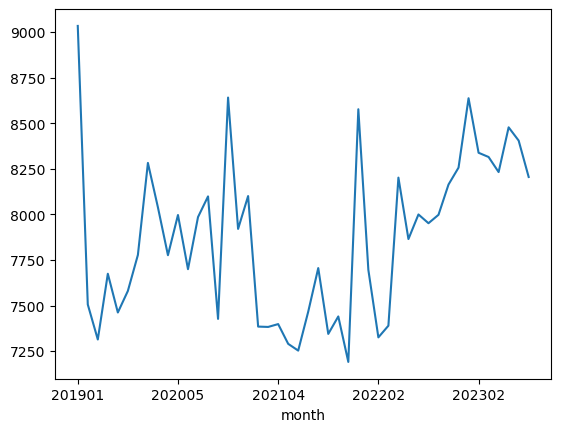

In [125]:
# nothing unusual about the distance
df_shares[df_shares.identifier_type == "GAID"].groupby(["month"])[
    "hw_distance"
].mean().plot()

<Axes: xlabel='month'>

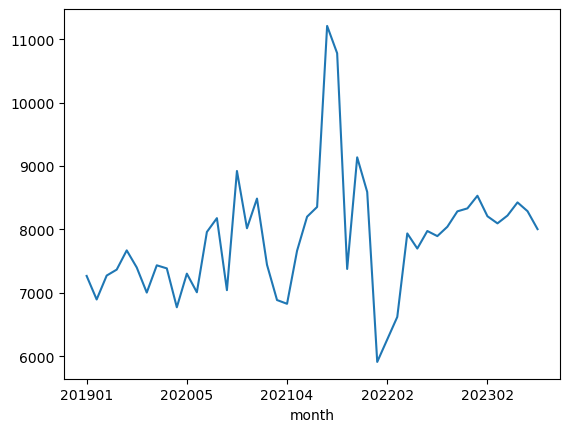

In [126]:
df_shares[df_shares.identifier_type == "IDFA"].groupby(["month"])[
    "hw_distance"
].mean().plot()

Save file to later merge it with home, work statistic and stat area

In [128]:
df_shares.to_csv(
    utils.get_path("processed", "dwells", "shares_remote_work_all_months.csv")
)

## The assumption of strong deviations in remote work trend is denominator number of days with signals in the interval 8am - 8pm. I changed it to be individual for each user based on his office days

In [3]:
import subprocess

for month in ["202004"]:
    print(month)
    subprocess.run(
        ["python", "../020-process-dwells/003-remote-work-monthly.py", "--month", month]
    )

202004
Parsed WKB to geometry
files are uploaded
Exploded the hours into separate rows
                             identifier  ... flag_weekend
0  0053a877-6765-488d-ba2c-123284414887  ...        False
1  0053a877-6765-488d-ba2c-123284414887  ...        False

[2 rows x 16 columns]
remote_work/hours_202004.csv saved
Index(['identifier', 'identifier_type', 'month', 'date', 'geohash_home',
       'geohash_work', 'remote_work_probability',
       'flag_remote_work_comparison', 'flag_remote_work_min_prob',
       'flag_work_hours_day'],
      dtype='object')
files saved
png saved


In [8]:
for month in ["202006"]:
    print(month)
    subprocess.run(
        ["python", "../020-process-dwells/003-remote-work-monthly.py", "--month", month]
    )

202006
Parsed WKB to geometry
files are uploaded
Exploded the hours into separate rows
                             identifier  ... flag_weekend
0  00027df5-15bb-45e0-a316-38b0fa68bd01  ...        False
1  00027df5-15bb-45e0-a316-38b0fa68bd01  ...        False

[2 rows x 16 columns]
remote_work/hours_202006.csv saved
Index(['identifier', 'identifier_type', 'month', 'date', 'geohash_home',
       'geohash_work', 'remote_work_probability',
       'flag_remote_work_comparison', 'flag_remote_work_min_prob',
       'flag_work_hours_day'],
      dtype='object')
files saved
png saved


### Analyse hours to select write thresholds

In [12]:
df_hours201901 = pd.read_csv(
    utils.get_path("processed", "dwells", "remote_work/hours_201901.csv")
)

<Axes: >

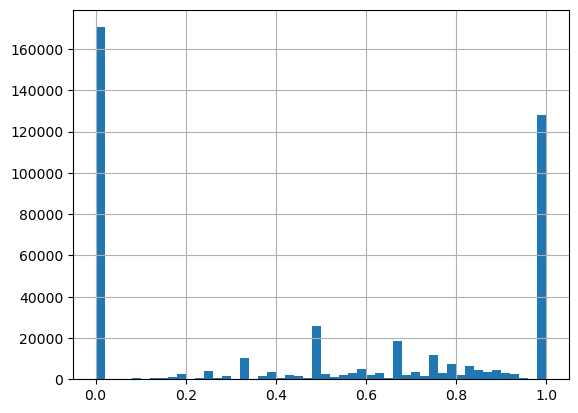

In [44]:
(df_hours201901["prob_home_at_hour"] + df_hours201901["prob_office_at_hour"]).hist(
    bins=50
)

In [13]:
df_hours201901["prob_3rdplace_at_hour"] = 1 - (
    df_hours201901["prob_home_at_hour"] + df_hours201901["prob_office_at_hour"]
)

<Axes: >

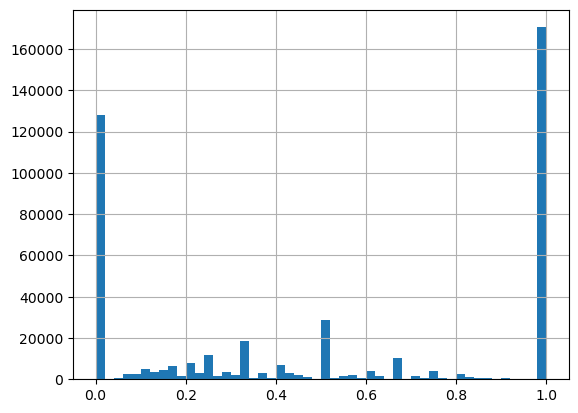

In [14]:
df_hours201901["prob_3rdplace_at_hour"].hist(bins=50)

In [35]:
df_hours201901[
    df_hours201901.identifier == "f412f222-1d49-4a87-afbb-0c2ee744e139"
].sort_values("local_date_time").to_csv("example_hours_one_user.csv")

In [ ]:
df_hours201901[df_hours201901.identifier == "f412f222-1d49-4a87-afbb-0c2ee744e139"]

# Bayesian Smoothing of Location Probabilities

In the following cells, we apply Bayesian smoothing to the location probabilities. This technique helps reduce noise in our probability estimates by incorporating prior knowledge about typical location patterns.

The smoothing works by:
1. Using the mean probability of each location type (home, office, third place) across all hours as our prior knowledge
2. Weighting the observed probabilities for each hour by these overall mean probabilities 
3. This gives us more stable estimates that are less sensitive to random fluctuations in the data

For each location type l and hour h, we calculate:

P_smoothed(l,h) = P_observed(l,h) * P_prior(l)

Where:
- P_observed(l,h) is the raw probability of being at location l during hour h
- P_prior(l) is the mean probability of being at location l across all hours
- P_smoothed(l,h) is the resulting smoothed probability

The smoothed probabilities help identify true patterns in location behavior while reducing the impact of outliers or sparse data points. By using the overall mean probabilities as priors, we account for the general likelihood of being in each type of location, regardless of time of day.


<Figure size 2000x600 with 0 Axes>

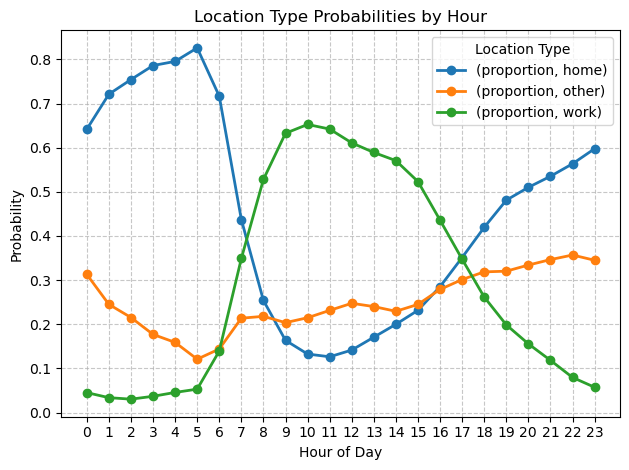

In [16]:
general_probability = pd.pivot(
    (
        df_hours201901[(df_hours201901["office_day"]) & (~df_hours201901.flag_weekend)]
        .groupby(["hour"])["location_type"]
        .value_counts(normalize=True)
        .reset_index()
    ),
    index="hour",
    columns="location_type",
)
plt.figure(figsize=(20, 6))
general_probability.plot(marker="o", linewidth=2, markersize=6)
plt.title("Location Type Probabilities by Hour", fontsize=12)
plt.xlabel("Hour of Day", fontsize=10)
plt.ylabel("Probability", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Location Type")
plt.xticks(range(0, 24))
plt.tight_layout()

In [19]:
# # Merge general probabilities with main dataframe
df_hours201901 = df_hours201901.merge(
    general_probability.droplevel(0, axis=1).reset_index(), on="hour", how="left"
)

# Calculate weighted probabilities using the general probabilities
df_hours201901["weighted_prob_office"] = (
    df_hours201901["prob_office_at_hour"] * df_hours201901["work"]
)
df_hours201901["weighted_prob_home"] = (
    df_hours201901["prob_home_at_hour"] * df_hours201901["home"]
)
df_hours201901["weighted_prob_3rdplace"] = 1 - (
    df_hours201901["weighted_prob_office"] + df_hours201901["weighted_prob_home"]
)

In [26]:
# Create predicted_location_type based on highest probability between home, work and other
df_hours201901["predicted_location_type"] = df_hours201901[
    ["weighted_prob_home", "weighted_prob_office", "weighted_prob_3rdplace"]
].idxmax(axis=1)

# Clean up the column names to match location_type values
df_hours201901["predicted_location_type"] = df_hours201901[
    "predicted_location_type"
].map(
    {
        "weighted_prob_home": "home",
        "weighted_prob_office": "work",
        "weighted_prob_3rdplace": "other",
    }
)

In [28]:
df_hours201901["predicted_location_type"].value_counts(normalize=True)

predicted_location_type
other    0.846859
work     0.086940
home     0.066201
Name: proportion, dtype: float64

In [29]:
# Remote work share
df_hours201901["flag_remote_work"] = (df_hours201901["location_type"] == "home") & (
    df_hours201901["predicted_location_type"] == "work"
)
# Calculate remote work share for each identifier
# Numerator: Sum of flag_remote_work
# Denominator: Count of predicted_location_type == 'work'
remote_work_share = (
    df_hours201901.groupby("identifier")
    .agg(
        {
            "flag_remote_work": "sum",
            "predicted_location_type": lambda x: (x == "work").sum(),
        }
    )
    .assign(
        remote_work_share=lambda x: (
            x["flag_remote_work"] / x["predicted_location_type"]
        ).fillna(0)
    )
)

In [30]:
remote_work_share["remote_work_share"].mean()

np.float64(0.09926491184143132)

<Axes: >

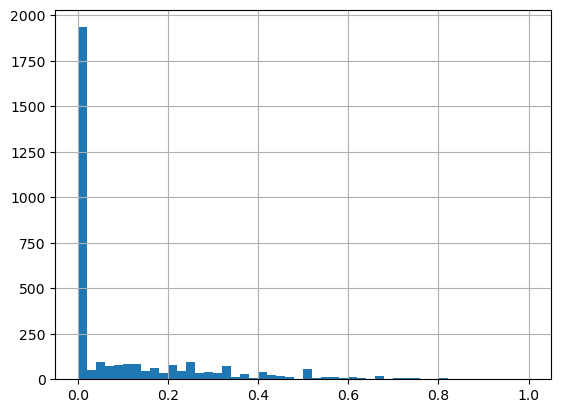

In [117]:
remote_work_share["remote_work_share"].hist(bins=50)

In [61]:
# df_hours201901["remote_work_probability"] = (
#     (~df_hours201901["office_day"])
#     *(~df_hours201901['flag_weekend'])
#     * df_hours201901["weighted_prob_office"]
#     * df_hours201901["flag_home_geohash"]
# )
# # 2nd approach. Based on comparing probability for home and office
# df_hours201901["flag_remote_work_comparison"] = (
#     (~df_hours201901["office_day"])
#     *(~df_hours201901['flag_weekend'])
#     * (df_hours201901["weighted_prob_home"] < df_hours201901["weighted_prob_office"])
#     * df_hours201901["flag_home_geohash"]
# )

In [63]:
# (df_hours201901["remote_work_probability"]>0.1).mean()

np.float64(0.041236225134545196)

In [64]:
# df_hours201901["flag_remote_work_comparison"].mean()

np.float64(0.039108687775607776)

In [65]:
# df_hours201901[df_hours201901["flag_remote_work_comparison"]][
#     "identifier"
# ].value_counts()[df_hours201901[df_hours201901["flag_remote_work_comparison"]][
#     "identifier"
# ].value_counts() > 1].shape

(2078,)

In [66]:
# df_hours201901.identifier.nunique()

3250

<Axes: >

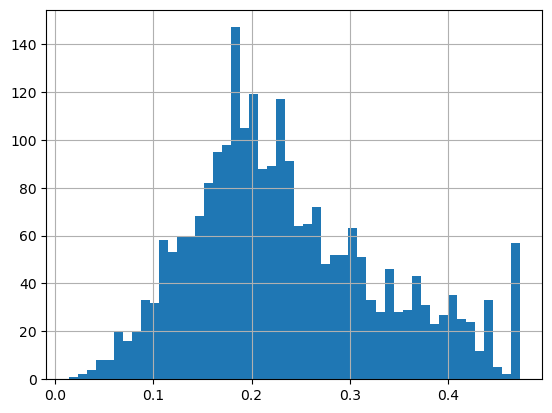

In [53]:
# df_hours201901[df_hours201901["flag_remote_work_comparison"]].groupby("identifier")[
#     "remote_work_probability"
# ].mean().hist(bins=50)

### TEST 2 other months

In [223]:
def process_month_remote_work(month: str) -> float:
    """
    Process remote work data for a given month and return average remote work share.

    Args:
        month (str): Month in format YYYYMM

    Returns:
        float: Average remote work share across all users
    """
    # Load data
    df_hours = pd.read_csv(
        utils.get_path("processed", "dwells", f"remote_work/hours_{month}.csv")
    )
    df_hours = df_hours[df_hours.identifier_type == "GAID"]
    df_hours["prob_3rdplace_at_hour"] = 1 - (
        df_hours["prob_office_at_hour"] + df_hours["prob_home_at_hour"]
    )
    # Calculate general probabilities for office days
    general_probability = pd.pivot(
        (
            df_hours[(df_hours["office_day"]) & (~df_hours.flag_weekend)]
            .groupby(["hour"])["location_type"]
            .value_counts(normalize=True)
            .reset_index()
        ),
        index="hour",
        columns="location_type",
    )

    # Merge general probabilities with main dataframe
    df_hours = df_hours.merge(
        general_probability.droplevel(0, axis=1).reset_index(), on="hour", how="left"
    )

    # Calculate weighted probabilities

    # Normalize probabilities
    # 
    # Create predicted location type
    df_hours["predicted_location_type"] = df_hours[
        ["prob_home_at_hour", "prob_office_at_hour", "prob_3rdplace_at_hour"]
    ].idxmax(axis=1)

    df_hours["predicted_location_type"] = df_hours["predicted_location_type"].map(
        {
            "prob_home_at_hour": "home",
            "prob_office_at_hour": "work",
            "prob_3rdplace_at_hour": "other",
        }
    )
    df_hours["flag_work_hours"] = df_hours["predicted_location_type"] == "work"
    # Calculate remote work flag
    df_hours["flag_remote_work"] = (df_hours["location_type"] == "home") & (
        df_hours["flag_work_hours"]
    )&(~df_hours["office_day"])
    
    df_hours["flag_work_hour_day"] = (
        df_hours.groupby(["identifier", "date"])["flag_work_hours"].transform("sum") > 0
    )

    # Approach 1:Calculate remote work share as sum of flag_remote_work over the total number of individual work hours per user
    remote_work_share = (
        df_hours.groupby("identifier")
        .agg(
            {
                "flag_remote_work": "sum",
                "predicted_location_type": lambda x: (x == "work").sum(),
            }
        )
        .assign(
            remote_work_share=lambda x: (
                x["flag_remote_work"] / x["predicted_location_type"]
            ).fillna(0)
        )
    )

    # Approach 2: Calculate remote work share based on work days with at least 1 remote work flags
    remote_work_days = (
        df_hours[df_hours["flag_work_hours_day"]]
        .groupby(["identifier", "date"])["flag_remote_work"]
        .agg(lambda x: sum(x) >= 1)
        .reset_index()
        .groupby("identifier")
        .agg({"flag_remote_work": "sum", "date": "count"})
        .assign(remote_work_share=lambda x: x["flag_remote_work"] / x["date"])
    )
    remote_share_app2 = remote_work_days["remote_work_share"].mean()
    remote_share_app1 = remote_work_share["remote_work_share"].mean()
    print(f"Month {month}: {remote_share_app1:.3f} {remote_share_app2:.3f}")
    return df_hours

In [289]:

israel_holidays = holidays.country_holidays('IL')
israel_holidays.items()

In [294]:
import holidays
from datetime import date

# Option 1: Get holidays for a specific year
month="202309"
israel_holidays_2019 = holidays.country_holidays('IL', years=month[:4])
print("2019 Holidays:")
for date, name in israel_holidays_2019.items():
    print(f"{date}: {name}")

# Option 2: Get holidays for a date range
israel_holidays_range = holidays.country_holidays('IL', years=[ 2023])
print("\nHolidays 2019-2023:")
for date, name in israel_holidays_range.items():
    print(f"{date}: {name}")

# Option 3: Get holidays between specific dates
start_date = date(2019, 1, 1)
end_date = date(2023, 12, 31)
israel_holidays_dates = holidays.country_holidays('IL', start=start_date, end=end_date)

2019 Holidays:
2019-09-30: ראש השנה
2019-10-01: ראש השנה
2019-10-09: יום כיפור
2019-10-14: סוכות
2019-10-21: שמחת תורה/שמיני עצרת
2019-04-20: פסח
2019-04-26: שביעי של פסח
2019-05-09: (נצפה) יום העצמאות
2019-06-09: שבועות

Holidays 2019-2023:
2023-09-16: ראש השנה
2023-09-17: ראש השנה
2023-09-25: יום כיפור
2023-09-30: סוכות
2023-10-07: שמחת תורה/שמיני עצרת
2023-04-06: פסח
2023-04-12: שביעי של פסח
2023-04-26: יום העצמאות
2023-05-26: שבועות


TypeError: 'datetime.date' object is not callable

In [224]:
# Example usage:
months = ["201901", "202004", "202006", "202309"]  # Add all months you want to process
results = {}

for month in months:
    # try:
    df_hours = process_month_remote_work(month)
    results[month] = df_hours

    # except Exception as e:
    #     print(f"Error processing month {month}: {str(e)}")

Month 201901: 0.127 0.171
Month 202004: 0.221 0.273
Month 202006: 0.261 0.300
Month 202309: 0.124 0.169


In [235]:
df_hours202309 = results["202309"]
df_hours202004 = results["202004"]
df_hours202006 = results["202006"]
df_hours201901 = results["201901"]

In [236]:
df_hours202309_remote_work = (
    df_hours202309[df_hours202309["flag_work_hours_day"]]
    .groupby(["identifier", "date"])["flag_remote_work"]
    .agg(lambda x: sum(x) >= 1)
    .reset_index()
)
df_hours201901_remote_work = (
    df_hours201901[df_hours201901["flag_work_hours_day"]]
    .groupby(["identifier", "date"])["flag_remote_work"]
    .agg(lambda x: sum(x) >= 1)
    .reset_index()
)

<Axes: >

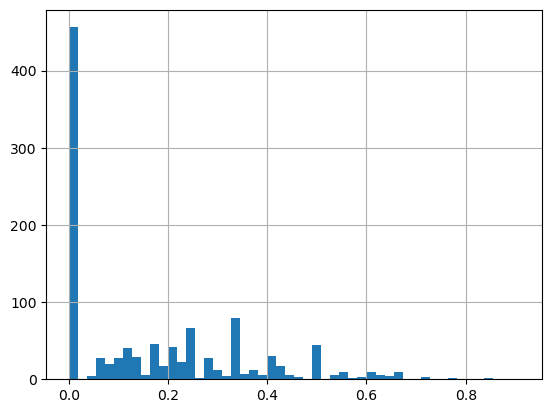

In [237]:
df_hours201901_remote_work.groupby("identifier")["flag_remote_work"].mean().hist(
    bins=50
)

<Axes: >

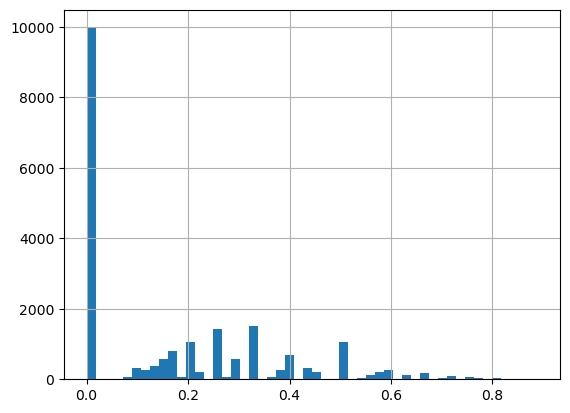

In [238]:
df_hours202309_remote_work.groupby("identifier")["flag_remote_work"].mean().hist(
    bins=50
)

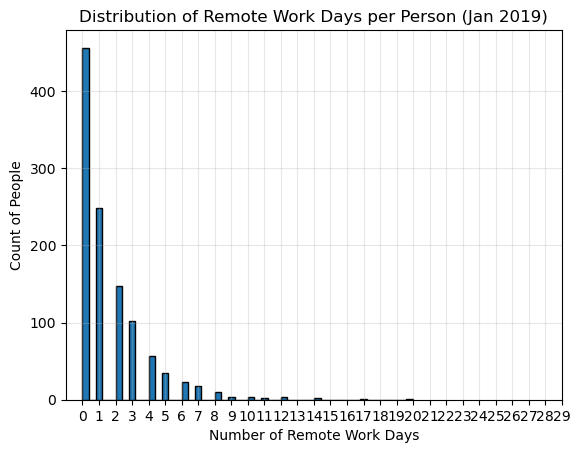

In [239]:
# Plot histogram of total remote work days per identifier in Jan 2019
df_hours201901_remote_work.groupby("identifier")["flag_remote_work"].sum().hist(
    bins=50, edgecolor="black"
)
plt.title("Distribution of Remote Work Days per Person (Jan 2019)")
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Count of People")
plt.xticks(range(0, 30))
plt.grid(True, alpha=0.3)

In [258]:
df_hours201901_remote_work

,identifier,date,flag_remote_work
0,003b6189-ca3d-46e8-91aa-f9c271a8826e,2019-01-01,True
1,003b6189-ca3d-46e8-91aa-f9c271a8826e,2019-01-03,True
2,003b6189-ca3d-46e8-91aa-f9c271a8826e,2019-01-07,True
3,003b6189-ca3d-46e8-91aa-f9c271a8826e,2019-01-08,False
4,003b6189-ca3d-46e8-91aa-f9c271a8826e,2019-01-09,False
...,...,...,...
8991,ffe70b82-8ef6-4ffc-901a-9a6acc73d2b0,2019-01-20,True
8992,ffe70b82-8ef6-4ffc-901a-9a6acc73d2b0,2019-01-21,False
8993,ffe70b82-8ef6-4ffc-901a-9a6acc73d2b0,2019-01-22,True
8994,ffe70b82-8ef6-4ffc-901a-9a6acc73d2b0,2019-01-27,True


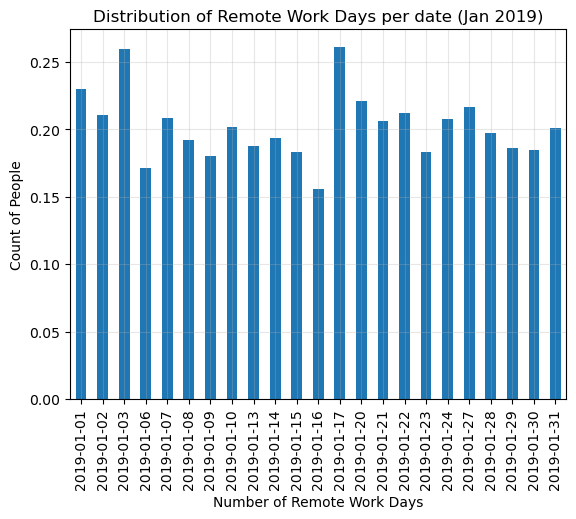

In [244]:
df_hours201901_remote_work.groupby("date")["flag_remote_work"].mean().plot(
    kind='bar'
)
plt.title("Distribution of Remote Work Days per date (Jan 2019)")
plt.xlabel(" Date")
plt.ylabel("Share of People")
# plt.xticks(range(0, 30))
plt.grid(True, alpha=0.3)

In [248]:
df_hours201901[df_hours201901.flag_remote_work]['bump_count'].mean()

np.float64(18.193865030674846)

In [250]:
df_hours201901.groupby(['identifier','date','hour']).size()[df_hours201901.groupby(['identifier','date','hour']).size()>1]

Series([], dtype: int64)

In [249]:
df_hours202309[df_hours202309.flag_remote_work]['bump_count'].mean()

np.float64(5.620211673643472)

In [ ]:
df_hours201901[df_hours201901.flag_remote_work]['bump_count'].mean()

In [246]:
import holidays
holidays.Israel()

holidays.country_holidays('IL')

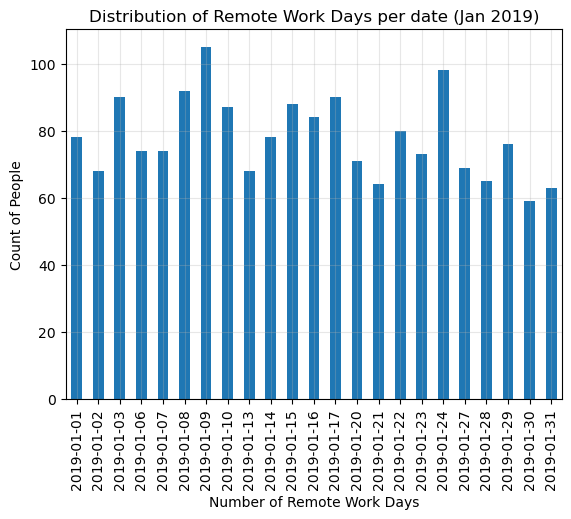

In [277]:
df_hours201901_remote_work.groupby("date")["flag_remote_work"].sum().plot(
    kind='bar'
)
plt.title("Distribution of Remote Work Days per date (Jan 2019)")
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Count of People")
# plt.xticks(range(0, 30))
plt.grid(True, alpha=0.3)

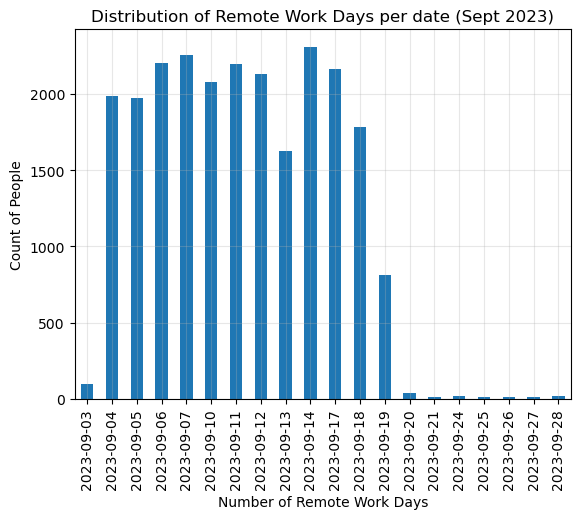

In [278]:
df_hours202309_remote_work.groupby("date")["flag_remote_work"].sum().plot(
    kind='bar'
)
plt.title("Distribution of Remote Work Days per date (Sept 2023)")
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Count of People")
# plt.xticks(range(0, 30))
plt.grid(True, alpha=0.3)

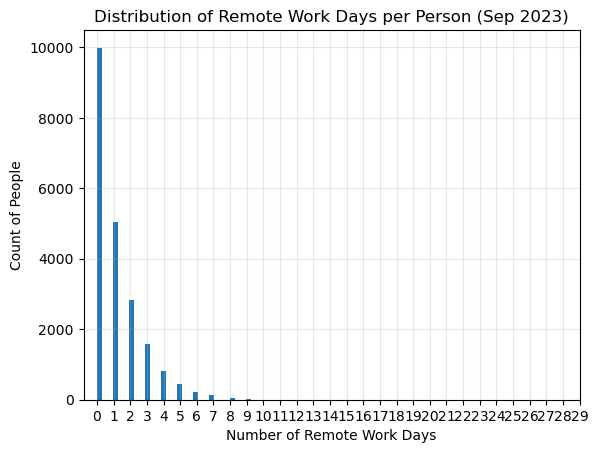

In [240]:
df_hours202309_remote_work.groupby("identifier")["flag_remote_work"].sum().hist(bins=50)
plt.title("Distribution of Remote Work Days per Person (Sep 2023)")
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Count of People")
plt.xticks(range(0, 30))
plt.grid(True, alpha=0.3)

Text(0, 0.5, 'Total Work Days')

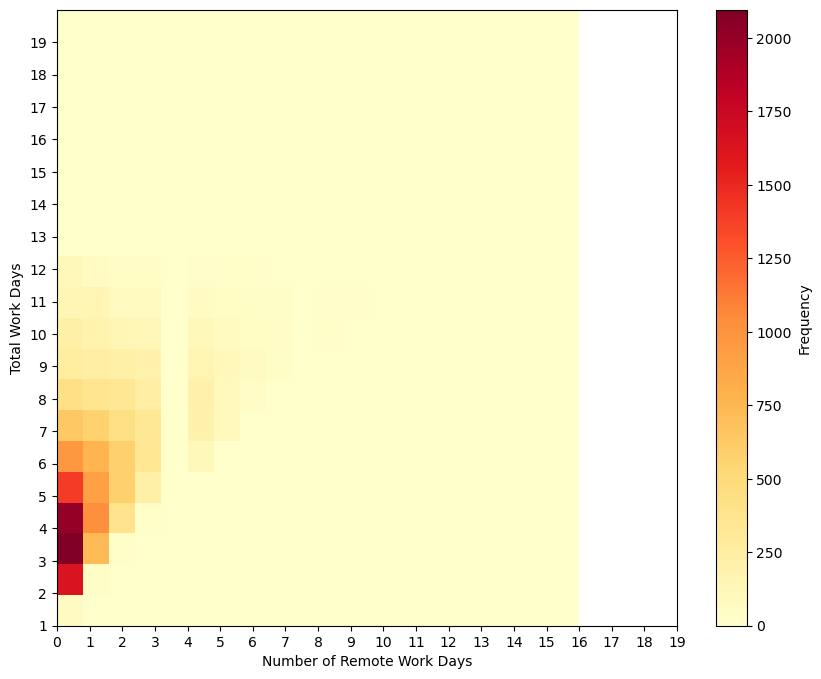

In [251]:
import seaborn as sns

# Group by identifier and calculate sum and count of remote work days
remote_work_stats = (
    df_hours202309_remote_work.groupby("identifier")["flag_remote_work"]
    .agg(["sum", "count"])
    .reset_index()
)

# Create 2D histogram / heatmap to show frequency
plt.figure(figsize=(10, 8))
heatmap = plt.hist2d(
    remote_work_stats["sum"], remote_work_stats["count"], bins=20, cmap="YlOrRd"
)
plt.colorbar(label="Frequency")
plt.yticks(range(1, 20))
plt.xticks(range(0, 20))
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Total Work Days")

Text(0, 0.5, 'Total Work Days')

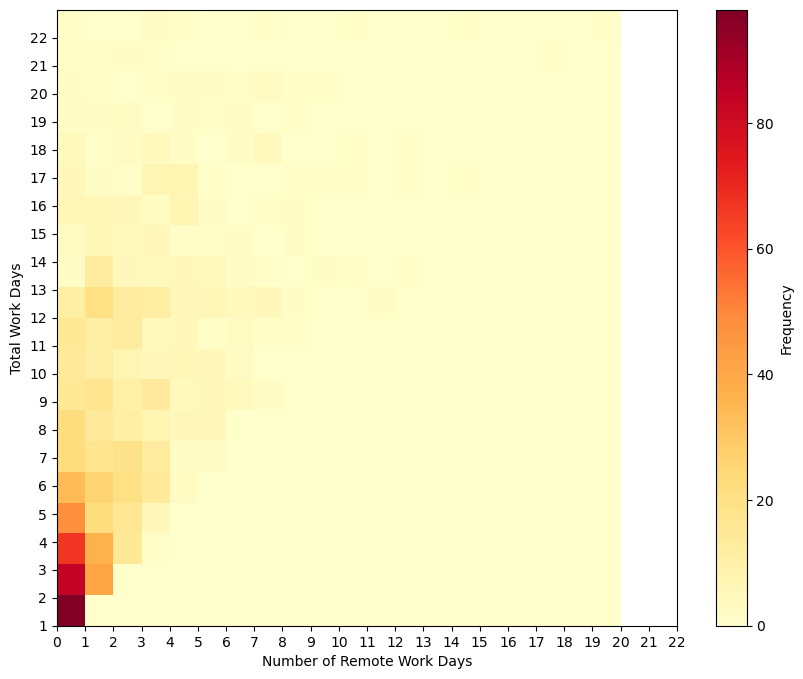

In [255]:
import seaborn as sns

# Group by identifier and calculate sum and count of remote work days
remote_work_stats = (
    df_hours201901_remote_work.groupby("identifier")["flag_remote_work"]
    .agg(["sum", "count"])
    .reset_index()
)

# Create 2D histogram / heatmap to show frequency
plt.figure(figsize=(10, 8))
heatmap = plt.hist2d(
    remote_work_stats["sum"], remote_work_stats["count"], bins=20, cmap="YlOrRd"
)
plt.colorbar(label="Frequency")
plt.xticks(range(0, 23))
plt.yticks(range(1, 23))
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Total Work Days")

In [269]:
def plot_remote_work_heatmap(df_hours: pd.DataFrame):
    # Group by identifier and calculate sum and count of remote work days
    remote_work_stats_hour_date = (
        df_hours.groupby(["date","hour"])["flag_remote_work"].sum()
        .reset_index()
    )
    sns.heatmap(pd.pivot(remote_work_stats_hour_date
                     , index="date", columns="hour", values="flag_remote_work"), cmap="YlOrRd")
    plt.show()


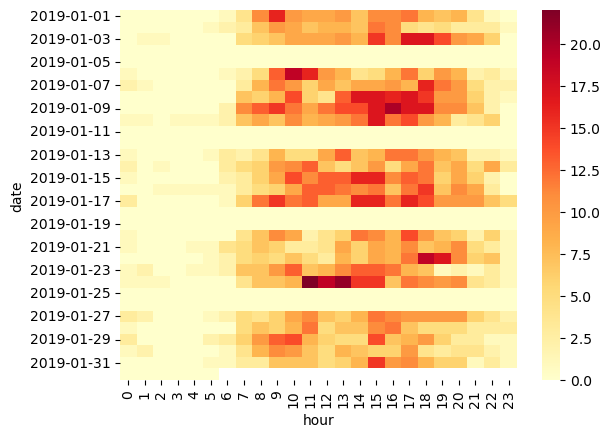

In [270]:

 plot_remote_work_heatmap(df_hours201901)

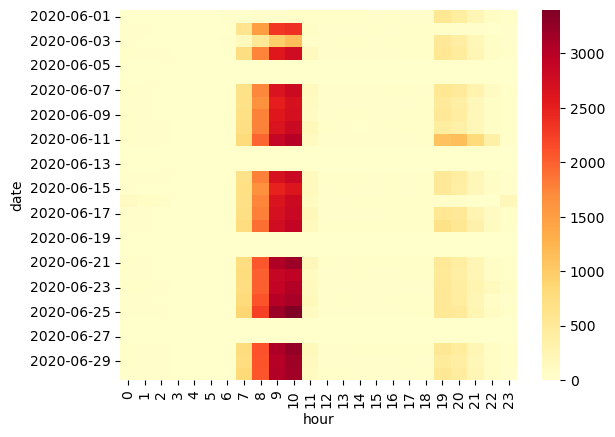

In [271]:

plot_remote_work_heatmap(df_hours202006)

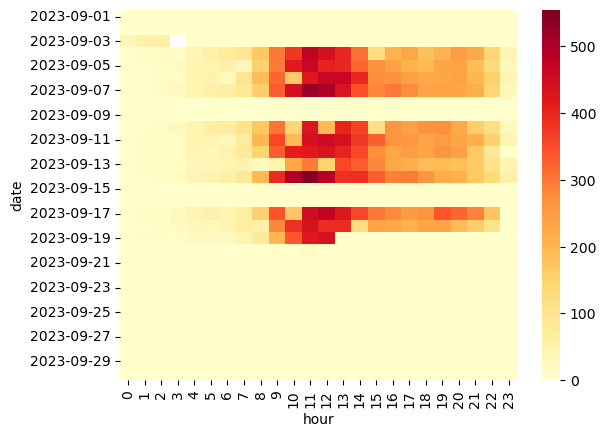

In [272]:
plot_remote_work_heatmap(df_hours202309)

In [257]:
df_hours201901

,Unnamed: 0,identifier,identifier_type,timestamp,local_date_time,province,classification,duration_seconds,centroid_latitude,centroid_longitude,...,flag_work_hours_day,remote_work_probability,flag_remote_work_comparison,prob_3rdplace_at_hour,home,other,work,predicted_location_type,flag_remote_work,flag_work_hour_day
0,35,87fe535f-38fb-4330-aafc-def1e55b3abf,GAID,2019-01-11 14:22:12,2019-01-11 16:22:12,Tel Aviv,AREA_DWELL,183.0,32.074279,34.798954,...,False,0.0,False,1.0,0.189552,0.169652,0.640796,other,False,False
1,43,696d7cdf-90ed-49b4-9001-3c0d7bf940a0,GAID,2019-01-13 08:28:37,2019-01-13 10:28:37,HaMerkaz,AREA_DWELL,5398.0,32.089400,34.868579,...,False,0.0,False,1.0,0.092699,0.122959,0.784342,other,False,False
2,44,696d7cdf-90ed-49b4-9001-3c0d7bf940a0,GAID,2019-01-13 08:28:37,2019-01-13 10:28:37,HaMerkaz,AREA_DWELL,5398.0,32.089400,34.868579,...,False,0.0,False,1.0,0.084099,0.129136,0.786765,other,False,False
3,56,1aa4158c-0d3d-4c9c-9064-3887d38d56e5,GAID,2019-01-19 20:03:03,2019-01-19 22:03:03,HaMerkaz,AREA_DWELL,226.0,32.158267,34.900256,...,False,0.0,False,1.0,0.666308,0.210980,0.122713,other,False,False
4,58,f9a0a7ae-1be6-42d0-b1e2-c6b9d2324113,GAID,2019-01-10 09:14:35,2019-01-10 11:14:35,Tel Aviv,AREA_DWELL,552.0,32.051473,34.768280,...,True,0.0,False,0.0,0.084099,0.129136,0.786765,work,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80427,452631,3ee5c97c-8608-404c-bcdf-2cee2f13303f,GAID,2019-01-25 12:16:44,2019-01-25 14:16:44,Tel Aviv,AREA_DWELL,9713.0,32.091639,34.777061,...,False,0.0,False,1.0,0.134598,0.148936,0.716466,other,False,False
80428,452632,3ee5c97c-8608-404c-bcdf-2cee2f13303f,GAID,2019-01-25 12:16:44,2019-01-25 14:16:44,Tel Aviv,AREA_DWELL,9713.0,32.091639,34.777061,...,False,0.0,False,1.0,0.189552,0.169652,0.640796,other,False,False
80429,452633,709d21f9-4d3d-4701-855e-bc4a088d8aa5,GAID,2019-01-08 02:30:33,2019-01-08 04:30:33,HaMerkaz,AREA_DWELL,7790.0,32.072072,34.935418,...,True,0.0,False,0.0,0.802030,0.116751,0.081218,work,False,True
80430,452634,709d21f9-4d3d-4701-855e-bc4a088d8aa5,GAID,2019-01-08 02:30:33,2019-01-08 04:30:33,HaMerkaz,AREA_DWELL,7790.0,32.072072,34.935418,...,True,0.0,False,0.0,0.816456,0.110759,0.072785,work,False,True


Text(0, 0.5, 'Total Work Days')

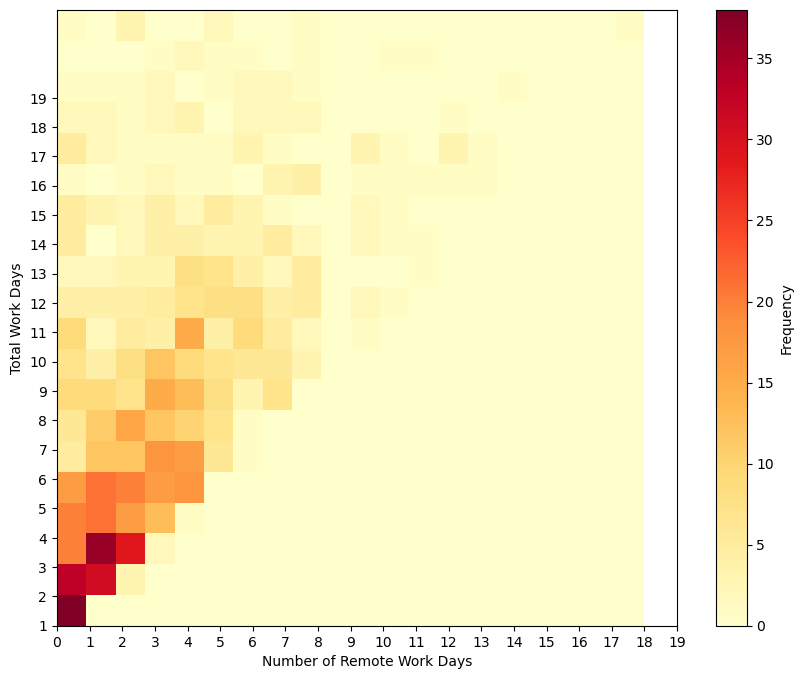

In [138]:
df_hours202004_remote_work = (
    df_hours202004[df_hours202004["flag_work_hours_day"]]
    .groupby(["identifier", "date"])["flag_remote_work"]
    .agg(lambda x: sum(x) >= 1)
    .reset_index()
)
import seaborn as sns

# Group by identifier and calculate sum and count of remote work days
remote_work_stats = (
    df_hours202004_remote_work.groupby("identifier")["flag_remote_work"]
    .agg(["sum", "count"])
    .reset_index()
)

# Create 2D histogram / heatmap to show frequency
plt.figure(figsize=(10, 8))
heatmap = plt.hist2d(
    remote_work_stats["sum"], remote_work_stats["count"], bins=20, cmap="YlOrRd"
)
plt.colorbar(label="Frequency")
plt.xticks(range(0, 20))
plt.yticks(range(1, 20))
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Total Work Days")

Text(0, 0.5, 'Total Work Days')

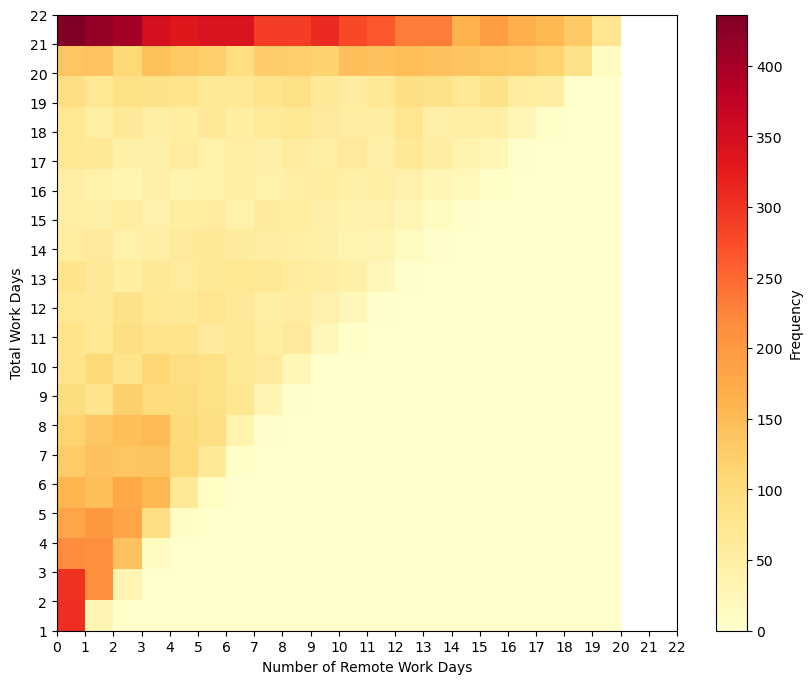

In [141]:
df_hours202006_remote_work = (
    df_hours202006[df_hours202006["flag_work_hours_day"]]
    .groupby(["identifier", "date"])["flag_remote_work"]
    .agg(lambda x: sum(x) >= 1)
    .reset_index()
)
import seaborn as sns

# Group by identifier and calculate sum and count of remote work days
remote_work_stats = (
    df_hours202006_remote_work.groupby("identifier")["flag_remote_work"]
    .agg(["sum", "count"])
    .reset_index()
)

# Create 2D histogram / heatmap to show frequency
plt.figure(figsize=(10, 8))
heatmap = plt.hist2d(
    remote_work_stats["sum"], remote_work_stats["count"], bins=20, cmap="YlOrRd"
)
plt.colorbar(label="Frequency")
plt.xticks(range(0, 23))
plt.yticks(range(1, 23))
plt.xlabel("Number of Remote Work Days")
plt.ylabel("Total Work Days")

## 2019

In [164]:
df_hours201901["identifier_type"].value_counts()

identifier_type
GAID    80432
Name: count, dtype: int64

In [165]:
df_user_days_work_remote_2019 = (
    df_hours201901_remote_work.groupby("identifier")["flag_remote_work"]
    .agg(["sum", "count"])
    .reset_index()
)

In [166]:
df_user_days_work_remote_2019["remote_work_share"] = (
    df_user_days_work_remote_2019["sum"] / df_user_days_work_remote_2019["count"]
)
df_user_days_work_remote_2019["remote_work_share"].mean()

np.float64(0.1998761815109221)

In [167]:
# this is completely unrealistic
(df_user_days_work_remote_2019["remote_work_share"] > 0).mean()

np.float64(0.6316262353998203)

## 2023

In [158]:
df_user_days_work_remote = (
    df_hours202309_remote_work.groupby("identifier")["flag_remote_work"]
    .agg(["sum", "count"])
    .reset_index()
)

In [159]:
df_user_days_work_remote["remote_work_share"] = (
    df_user_days_work_remote["sum"] / df_user_days_work_remote["count"]
)
df_user_days_work_remote["remote_work_share"].mean()

np.float64(0.20754901004888557)

In [161]:
(df_user_days_work_remote["remote_work_share"] > 0).mean()

np.float64(0.5911090092220384)

In [67]:
# never predict work on weekends
df_hours202309[df_hours202309["predicted_location_type"] == "work"][
    "flag_weekend"
].mean()

np.float64(0.0)

## What happens in 201901

In [168]:
df_user_days_work_remote_2019

,identifier,sum,count,remote_work_share
0,003b6189-ca3d-46e8-91aa-f9c271a8826e,5,12,0.416667
1,006d81d0-9b99-4201-aff6-c254cb43c996,3,9,0.333333
2,009cf6e6-9aef-4bc9-945f-d58713e9c709,5,17,0.294118
3,00a5280e-060f-4a57-9c89-24c802064fd7,5,11,0.454545
4,00b4a772-df6a-48b5-b351-0119fc65326f,1,7,0.142857
...,...,...,...,...
1108,fef65a4e-4401-444a-b26e-0a300d754659,10,17,0.588235
1109,ff0ea7ca-3a43-4748-8b13-a897e2dd846f,6,10,0.600000
1110,ff566e99-3256-420e-bbab-9186580de843,0,3,0.000000
1111,ff70f720-3f13-469b-8e37-60d110b17fea,4,17,0.235294


In [176]:
df_hours201901[
    (df_hours201901["identifier"] == "003b6189-ca3d-46e8-91aa-f9c271a8826e")
    & (df_hours201901["date"] == "2019-01-07")
][
    [
        "office_day",
        "location_type",
        "local_date_time",
        "date",
        "hour",
        "predicted_location_type",
        "flag_weekend",
        "duration_seconds",
        "weighted_prob_office",
        "weighted_prob_home",
        "weighted_prob_3rdplace",
        "flag_remote_work",
        "home",
        "work",
        "other",
    ]
].sort_values(
    ["local_date_time", "hour"]
)

,office_day,location_type,local_date_time,date,hour,predicted_location_type,flag_weekend,duration_seconds,weighted_prob_office,weighted_prob_home,weighted_prob_3rdplace,flag_remote_work,home,work,other
53745,False,home,2019-01-07 07:08:43,2019-01-07,7,other,False,13518.0,0.0,0.0,1.0,False,0.535509,0.340691,0.123800
53746,False,home,2019-01-07 07:08:43,2019-01-07,8,home,False,13518.0,0.0,1.0,0.0,False,0.276125,0.574394,0.149481
53747,False,home,2019-01-07 07:08:43,2019-01-07,9,work,False,13518.0,1.0,0.0,0.0,True,0.144578,0.723939,0.131482
53748,False,home,2019-01-07 07:08:43,2019-01-07,10,work,False,13518.0,1.0,0.0,0.0,True,0.092699,0.784342,0.122959


In [221]:
def process_month_remote_work(df_hours: pd.DataFrame):
    df_hours["flag_remote_work_min_work_prob"] = (
        (df_hours["location_type"] == "home")
        & (df_hours["flag_work_hours"])
        & (df_hours["work"] > 0.5)
    )
    month = df_hours.month.unique()[0]
    df_hours["smoothed_prob_office"] = (
        df_hours["prob_office_at_hour"] * df_hours["work"]
    )
    df_hours["smoothed_prob_home"] = df_hours["prob_home_at_hour"] * df_hours["home"]
    df_hours["smoothed_prob_3rdplace"] = (
        df_hours["prob_3rdplace_at_hour"] * df_hours["other"]
    )
    df_hours["predicted_location_type_smooth_prob"] = df_hours[
        ["smoothed_prob_home", "smoothed_prob_office", "smoothed_prob_3rdplace"]
    ].idxmax(axis=1)
    df_hours["flag_remote_work_smooth_prob"] = (
        df_hours["predicted_location_type_smooth_prob"] == "smoothed_prob_office"
    ) & (df_hours["location_type"] == "home")
    
    df_hours_remote_work = (
        df_hours[df_hours["flag_work_hours_day"]]
        .groupby(["identifier", "date"])[
            [
                "flag_remote_work",
                "flag_remote_work_smooth_prob",
                "flag_remote_work_min_work_prob",
            ]
        ]
        .agg(lambda x: sum(x) >= 1)
        .reset_index()
    )
    df_user_days_work_remote = (
        df_hours_remote_work.groupby("identifier")
        .agg(
            {
                "flag_remote_work": ["sum", "count"],
                "flag_remote_work_smooth_prob": "sum", 
                "flag_remote_work_min_work_prob": "sum",
            }
        )
        .reset_index()
    )
    df_user_days_work_remote.columns = [
        "identifier",
        "remote_work_days",
        "total_work_days", 
        "remote_work_days_smooth",
        "remote_work_days_min_work"
    ]
    df_user_days_work_remote["remote_work_share"] = (
        df_user_days_work_remote["remote_work_days"]
        / df_user_days_work_remote["total_work_days"]
    )
    df_user_days_work_remote["remote_work_share_smooth"] = (
        df_user_days_work_remote["remote_work_days_smooth"]
        / df_user_days_work_remote["total_work_days"]
    )
    df_user_days_work_remote["remote_work_share_min_work"] = (
        df_user_days_work_remote["remote_work_days_min_work"]
        / df_user_days_work_remote["total_work_days"]
    )
    print(
        f"Month {month}: {df_user_days_work_remote['remote_work_share'].mean():.3f} {df_user_days_work_remote['remote_work_share_smooth'].mean():.3f} {df_user_days_work_remote['remote_work_share_min_work'].mean():.3f}"
    )
    return df_user_days_work_remote

In [210]:
df_user_days_work_remote_201901 = process_month_remote_work(df_hours201901)
df_user_days_work_remote_202309 = process_month_remote_work(df_hours202309)
df_user_days_work_remote_202004 = process_month_remote_work(df_hours202004)

df_user_days_work_remote_202006 = process_month_remote_work(df_hours202006)

Month 201901: 0.200 0.232 0.146
Month 202309: 0.208 0.250 0.137
Month 202004: 0.308 0.361 0.183
Month 202006: 0.360 0.389 0.257


In [219]:
df_hours201901[(df_hours201901["identifier"]=="009cf6e6-9aef-4bc9-945f-d58713e9c709")&(df_hours201901.hour==15)][
    [
        "office_day",
        "location_type",
        "local_date_time",
        "date",
        "hour",
        "predicted_location_type",
        "flag_weekend",
        "duration_seconds",
        "weighted_prob_office",
        "weighted_prob_home",
        "weighted_prob_3rdplace",
        "smoothed_prob_home", "smoothed_prob_office", "smoothed_prob_3rdplace",
        "flag_remote_work",
        "home",
        "work",
        "other",
    ]
].sort_values(
    ["local_date_time", "hour"]
)

,office_day,location_type,local_date_time,date,hour,predicted_location_type,flag_weekend,duration_seconds,weighted_prob_office,weighted_prob_home,weighted_prob_3rdplace,smoothed_prob_home,smoothed_prob_office,smoothed_prob_3rdplace,flag_remote_work,home,work,other
64230,False,home,2019-01-01 15:38:12,2019-01-01,15,work,False,7377.0,0.666667,0.333333,0.0,0.044866,0.477644,0.000000,True,0.134598,0.716466,0.148936
64239,True,work,2019-01-09 13:19:36,2019-01-09,15,work,False,10182.0,0.666667,0.333333,0.0,0.044866,0.477644,0.000000,False,0.134598,0.716466,0.148936
21815,False,home,2019-01-19 13:43:27,2019-01-19,15,other,True,11719.0,0.000000,0.000000,1.0,0.000000,0.000000,0.148936,False,0.134598,0.716466,0.148936
34499,True,work,2019-01-20 15:16:53,2019-01-20,15,work,False,13399.0,0.666667,0.333333,0.0,0.044866,0.477644,0.000000,False,0.134598,0.716466,0.148936
49084,False,home,2019-01-25 13:29:23,2019-01-25,15,other,True,8067.0,0.000000,0.000000,1.0,0.000000,0.000000,0.148936,False,0.134598,0.716466,0.148936
48266,False,other,2019-01-26 14:37:41,2019-01-26,15,other,True,6335.0,0.000000,0.000000,1.0,0.000000,0.000000,0.148936,False,0.134598,0.716466,0.148936
54579,True,home,2019-01-29 14:36:18,2019-01-29,15,work,False,2872.0,0.666667,0.333333,0.0,0.044866,0.477644,0.000000,True,0.134598,0.716466,0.148936


In [215]:
df_hours201901.groupby("date")["flag_remote_work"].mean()

date
2019-01-01    0.063291
2019-01-02    0.053602
2019-01-03    0.074283
2019-01-04    0.000000
2019-01-05    0.000000
2019-01-06    0.059696
2019-01-07    0.061209
2019-01-08    0.056170
2019-01-09    0.059023
2019-01-10    0.053777
2019-01-11    0.000000
2019-01-12    0.000000
2019-01-13    0.054810
2019-01-14    0.059582
2019-01-15    0.060663
2019-01-16    0.050358
2019-01-17    0.088116
2019-01-18    0.000000
2019-01-19    0.000000
2019-01-20    0.058600
2019-01-21    0.058771
2019-01-22    0.059707
2019-01-23    0.054719
2019-01-24    0.067624
2019-01-25    0.000000
2019-01-26    0.000000
2019-01-27    0.069329
2019-01-28    0.060345
2019-01-29    0.057220
2019-01-30    0.055458
2019-01-31    0.056778
2019-02-01    0.000000
Name: flag_remote_work, dtype: float64

In [216]:
df_hours202309.groupby("date")["flag_remote_work"].mean()

date
2023-09-01    0.000000
2023-09-02    0.000000
2023-09-03    0.024135
2023-09-04    0.049504
2023-09-05    0.050942
2023-09-06    0.051014
2023-09-07    0.056357
2023-09-08    0.000000
2023-09-09    0.000000
2023-09-10    0.049597
2023-09-11    0.049739
2023-09-12    0.047111
2023-09-13    0.047816
2023-09-14    0.059807
2023-09-15    0.000000
2023-09-16    0.000000
2023-09-17    0.063352
2023-09-18    0.053847
2023-09-19    0.054198
2023-09-20    0.092050
2023-09-21    0.113971
2023-09-22    0.000000
2023-09-23    0.000000
2023-09-24    0.143813
2023-09-25    0.119355
2023-09-26    0.109155
2023-09-27    0.056133
2023-09-28    0.079812
2023-09-29    0.000000
2023-09-30    0.000000
Name: flag_remote_work, dtype: float64

In [208]:
df_hours["predicted_location_type_smooth_prob"]

predicted_location_type_smooth_prob
smoothed_prob_3rdplace    0.474049
smoothed_prob_office      0.270678
smoothed_prob_home        0.255273
Name: proportion, dtype: float64

<Axes: xlabel='hour'>

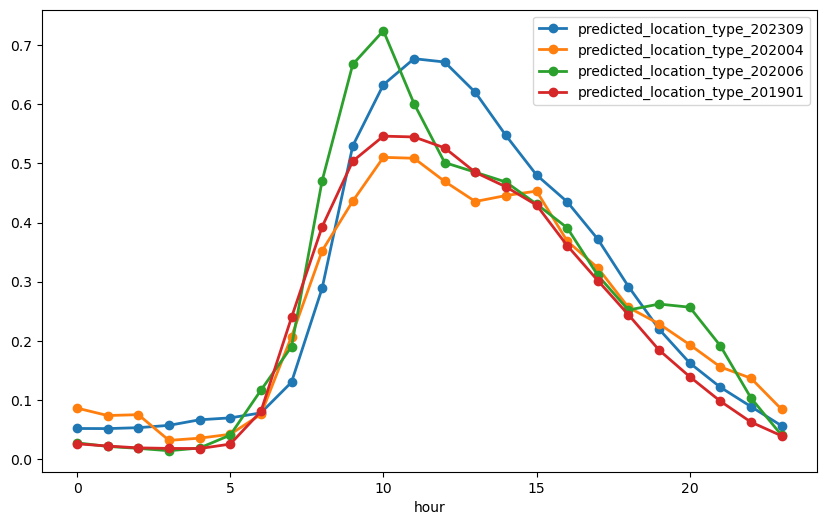

In [107]:
(
    df_hours202309[df_hours202309["flag_weekend"] == 0]
    .groupby("hour")["predicted_location_type"]
    .apply(lambda x: (x == "work").sum())
    / df_hours202309[df_hours202309["flag_weekend"] == 0]
    .groupby("hour")["predicted_location_type"]
    .count()
).to_frame().join(
    (
        df_hours202004[df_hours202004["flag_weekend"] == 0]
        .groupby("hour")["predicted_location_type"]
        .apply(lambda x: (x == "work").sum())
        / df_hours202004[df_hours202004["flag_weekend"] == 0]
        .groupby("hour")["predicted_location_type"]
        .count()
    ).to_frame(),
    lsuffix="_202309",
    rsuffix="_202004",
).join(
    (
        df_hours202006[df_hours202006["flag_weekend"] == 0]
        .groupby("hour")["predicted_location_type"]
        .apply(lambda x: (x == "work").sum())
        / df_hours202006[df_hours202006["flag_weekend"] == 0]
        .groupby("hour")["predicted_location_type"]
        .count()
    ).to_frame(),
    rsuffix="_202006",
).join(
    (
        df_hours201901[df_hours201901["flag_weekend"] == 0]
        .groupby("hour")["predicted_location_type"]
        .apply(lambda x: (x == "work").sum())
        / df_hours201901[df_hours201901["flag_weekend"] == 0]
        .groupby("hour")["predicted_location_type"]
        .count()
    ).to_frame(),
    lsuffix="_202006",
    rsuffix="_201901",
).plot(
    kind="line", marker="o", markersize=6, linewidth=2, figsize=(10, 6)
)

In [74]:
df_hours202309[
    (df_hours202309["predicted_location_type"] != "work")
    & (df_hours202309["flag_weekend"] == 0)
][(df_hours202309["hour"] == 12)]["predicted_location_type"].value_counts(
    normalize=True
)

predicted_location_type
other    0.621131
home     0.378869
Name: proportion, dtype: float64

In [75]:
df_hours202309[df_hours202309["predicted_location_type"] != "work"][
    (df_hours202309["hour"] == 12) & (df_hours202309["flag_weekend"] == 0)
].head(2)

,Unnamed: 0,identifier,identifier_type,timestamp,local_date_time,province,classification,duration_seconds,centroid_latitude,centroid_longitude,...,remote_work_probability,flag_remote_work_comparison,home,other,work,weighted_prob_office,weighted_prob_home,weighted_prob_3rdplace,predicted_location_type,flag_remote_work
83,83,baf0c133-a1d0-4103-a2d0-3aed1a26f81f,GAID,2023-09-07 09:39:02,2023-09-07 12:39:02,HaMerkaz,DWELL,432.0,32.311851,34.869986,...,0.0,False,0.100715,0.195918,0.703367,0.0,0.00,1.00,other,False
98,98,ebc049f9-ab0a-4f04-9395-bc8d90f495a4,GAID,2023-09-11 08:50:35,2023-09-11 11:50:35,HaMerkaz,DWELL,672.0,32.183785,34.871393,...,0.0,False,0.100715,0.195918,0.703367,0.0,0.75,0.25,home,False


In [79]:
df_hours202309[
    (df_hours202309.identifier == "ebc049f9-ab0a-4f04-9395-bc8d90f495a4")
    & (df_hours202309["hour"] == 12)
][
    [
        "date",
        "office_day",
        "flag_weekend",
        "hour",
        "location_type",
        "predicted_location_type",
        "duration_seconds",
        "weighted_prob_office",
        "weighted_prob_home",
        "weighted_prob_3rdplace",
    ]
].sort_values(
    "timestamp"
)

,date,office_day,flag_weekend,hour,location_type,predicted_location_type,duration_seconds,weighted_prob_office,weighted_prob_home,weighted_prob_3rdplace
98,2023-09-11,True,False,12,home,home,672.0,0.0,0.75,0.25
1247479,2023-09-12,True,False,12,home,home,3502.0,0.0,0.75,0.25
1464372,2023-09-14,True,False,12,home,home,8548.0,0.0,0.75,0.25
540047,2023-09-17,True,False,12,other,home,1120.0,0.0,0.75,0.25


In [89]:
df_sample = df_hours202309[
    (df_hours202309.date == "2023-09-12")
    & (df_hours202309.identifier == "ebc049f9-ab0a-4f04-9395-bc8d90f495a4")
][
    [
        "date",
        "the_geom",
        "timestamp",
        "office_day",
        "flag_weekend",
        "hour",
        "location_type",
        "predicted_location_type",
        "duration_seconds",
        "weighted_prob_office",
        "weighted_prob_home",
        "weighted_prob_3rdplace",
    ]
].sort_values(
    "timestamp"
)

In [93]:
df_sample

,date,the_geom,timestamp,office_day,flag_weekend,hour,location_type,predicted_location_type,duration_seconds,weighted_prob_office,weighted_prob_home,weighted_prob_3rdplace
599542,2023-09-12,POINT (34.879887399999994 32.1782766),2023-09-12 04:36:52,True,False,7,other,other,5050.0,0.000000,0.000000,1.000000
599543,2023-09-12,POINT (34.879887399999994 32.1782766),2023-09-12 04:36:52,True,False,8,other,other,5050.0,0.000000,0.000000,1.000000
599544,2023-09-12,POINT (34.879887399999994 32.1782766),2023-09-12 04:36:52,True,False,9,other,other,5050.0,0.000000,0.333333,0.666667
1570905,2023-09-12,POINT (34.87139605 32.183863900000006),2023-09-12 07:40:22,True,False,10,home,home,1147.0,0.333333,0.666667,0.000000
1247478,2023-09-12,POINT (34.871252166666665 32.18379193333333),2023-09-12 08:57:43,True,False,11,home,home,3502.0,0.000000,1.000000,0.000000
1247479,2023-09-12,POINT (34.871252166666665 32.18379193333333),2023-09-12 08:57:43,True,False,12,home,home,3502.0,0.000000,0.750000,0.250000
1726258,2023-09-12,POINT (34.87126425 32.1816405),2023-09-12 10:12:01,True,False,13,home,home,732.0,0.000000,0.500000,0.500000
1620699,2023-09-12,POINT (34.871496525 32.1838088),2023-09-12 11:34:53,True,False,14,home,home,2119.0,0.000000,1.000000,0.000000
349302,2023-09-12,POINT (34.8713954 32.18382825),2023-09-12 12:24:29,True,False,15,home,home,4586.0,0.000000,1.000000,0.000000
349303,2023-09-12,POINT (34.8713954 32.18382825),2023-09-12 12:24:29,True,False,16,home,home,4586.0,0.000000,0.666667,0.333333


This guy really work at night

In [92]:
utils.make_gdf(df_sample, geometry="the_geom").explore(column="location_type")

<Axes: xlabel='hour'>

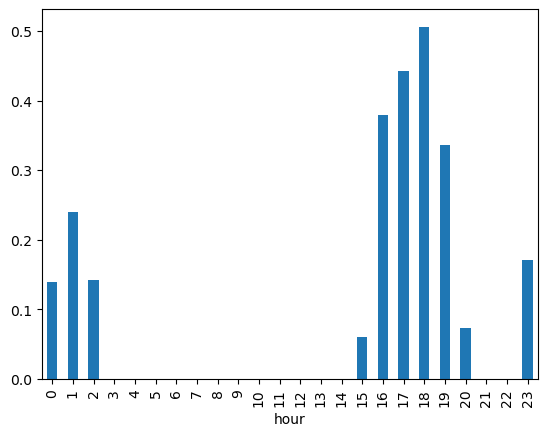

In [105]:
df_hours201901[
    df_hours201901.identifier == "2d05f283-6cd6-41d0-9db2-09da67260d1c"
].groupby("hour")["weighted_prob_office"].mean().plot(kind="bar")

<Axes: xlabel='hour'>

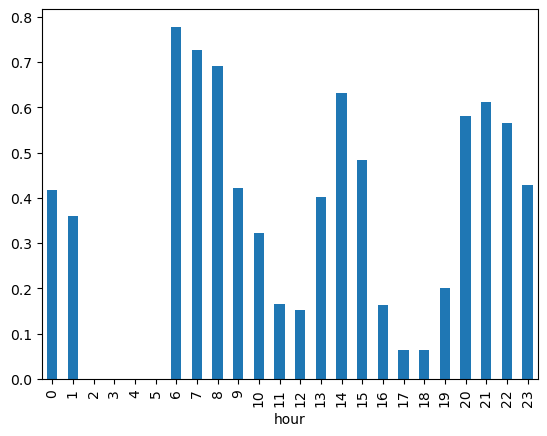

In [106]:
df_hours201901[
    df_hours201901.identifier == "2d05f283-6cd6-41d0-9db2-09da67260d1c"
].groupby("hour")["weighted_prob_home"].mean().plot(kind="bar")


Analysis for 201901:

1. Basic counts:
Total observations: 452636
Unique users: 3250

Office day distribution:
office_day
False    0.619951
True     0.380049
Name: proportion, dtype: float64

2. Location type distribution:
location_type
home     0.471271
other    0.383315
work     0.145415
Name: proportion, dtype: float64

3. Average probabilities:

prob_home_at_hour:
count    452636.000000
mean          0.265244
std           0.362241
min           0.000000
25%           0.000000
50%           0.000000
75%           0.500000
max           1.000000
Name: prob_home_at_hour, dtype: float64

prob_office_at_hour:
count    452636.000000
mean          0.222833
std           0.352211
min           0.000000
25%           0.000000
50%           0.000000
75%           0.400000
max           1.000000
Name: prob_office_at_hour, dtype: float64


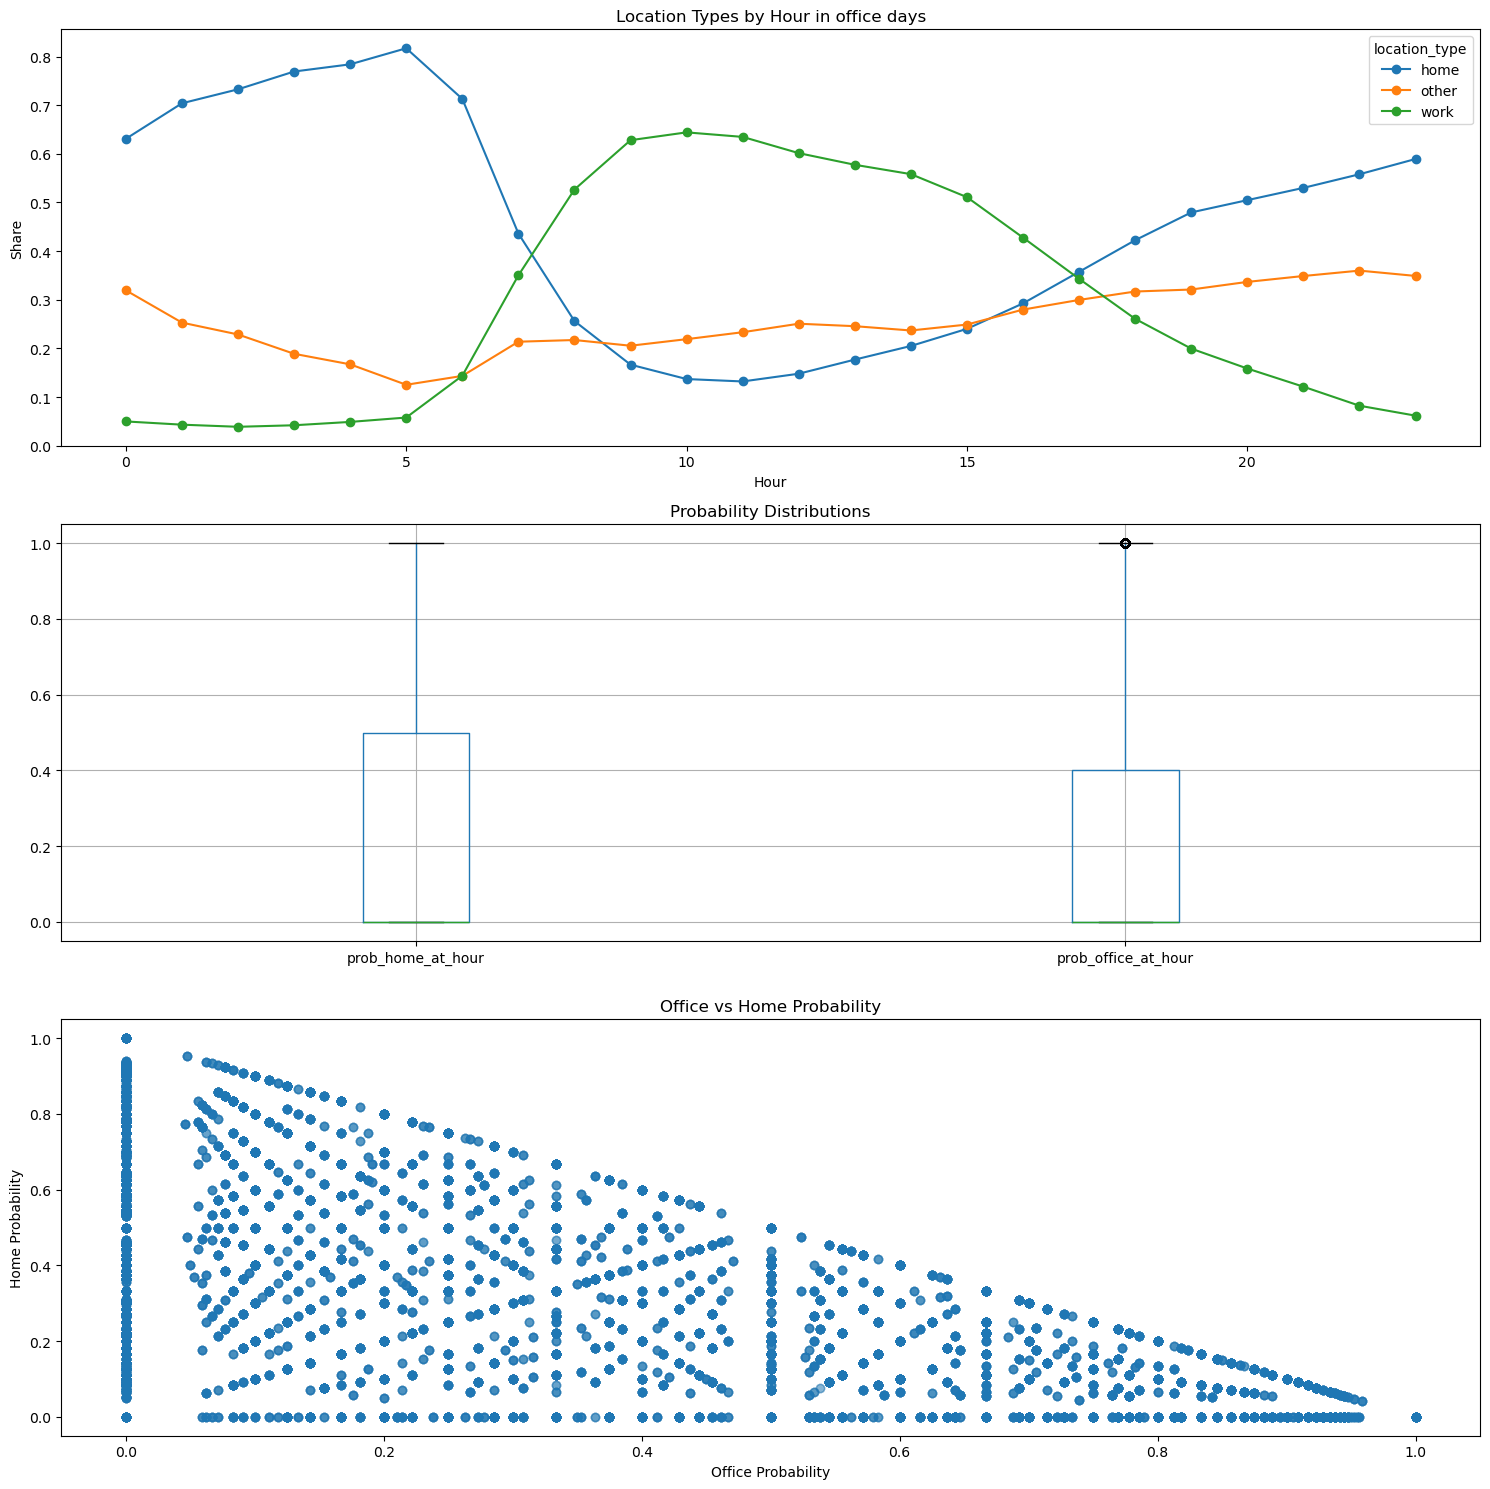


5. Data quality checks:

Probability sum > 1:
0.030496911425516308

Zero probability observations:
Home == 0: 0.5615439337569261
Office == 0: 0.645450207230534

6. User-level statistics:
       prob_home_at_hour  prob_office_at_hour   office_day  \
count        3250.000000          3250.000000  3250.000000   
mean            0.239864             0.250869     0.384129   
std             0.141264             0.134613     0.212223   
min             0.000000             0.000000     0.028846   
25%             0.137518             0.150574     0.200000   
50%             0.242050             0.228261     0.360233   
75%             0.333333             0.329396     0.545455   
max             0.798742             0.850000     1.000000   

       share_home_location  
count          3250.000000  
mean              0.486863  
std               0.168607  
min               0.009901  
25%               0.369461  
50%               0.480583  
75%               0.604132  
max               0.9

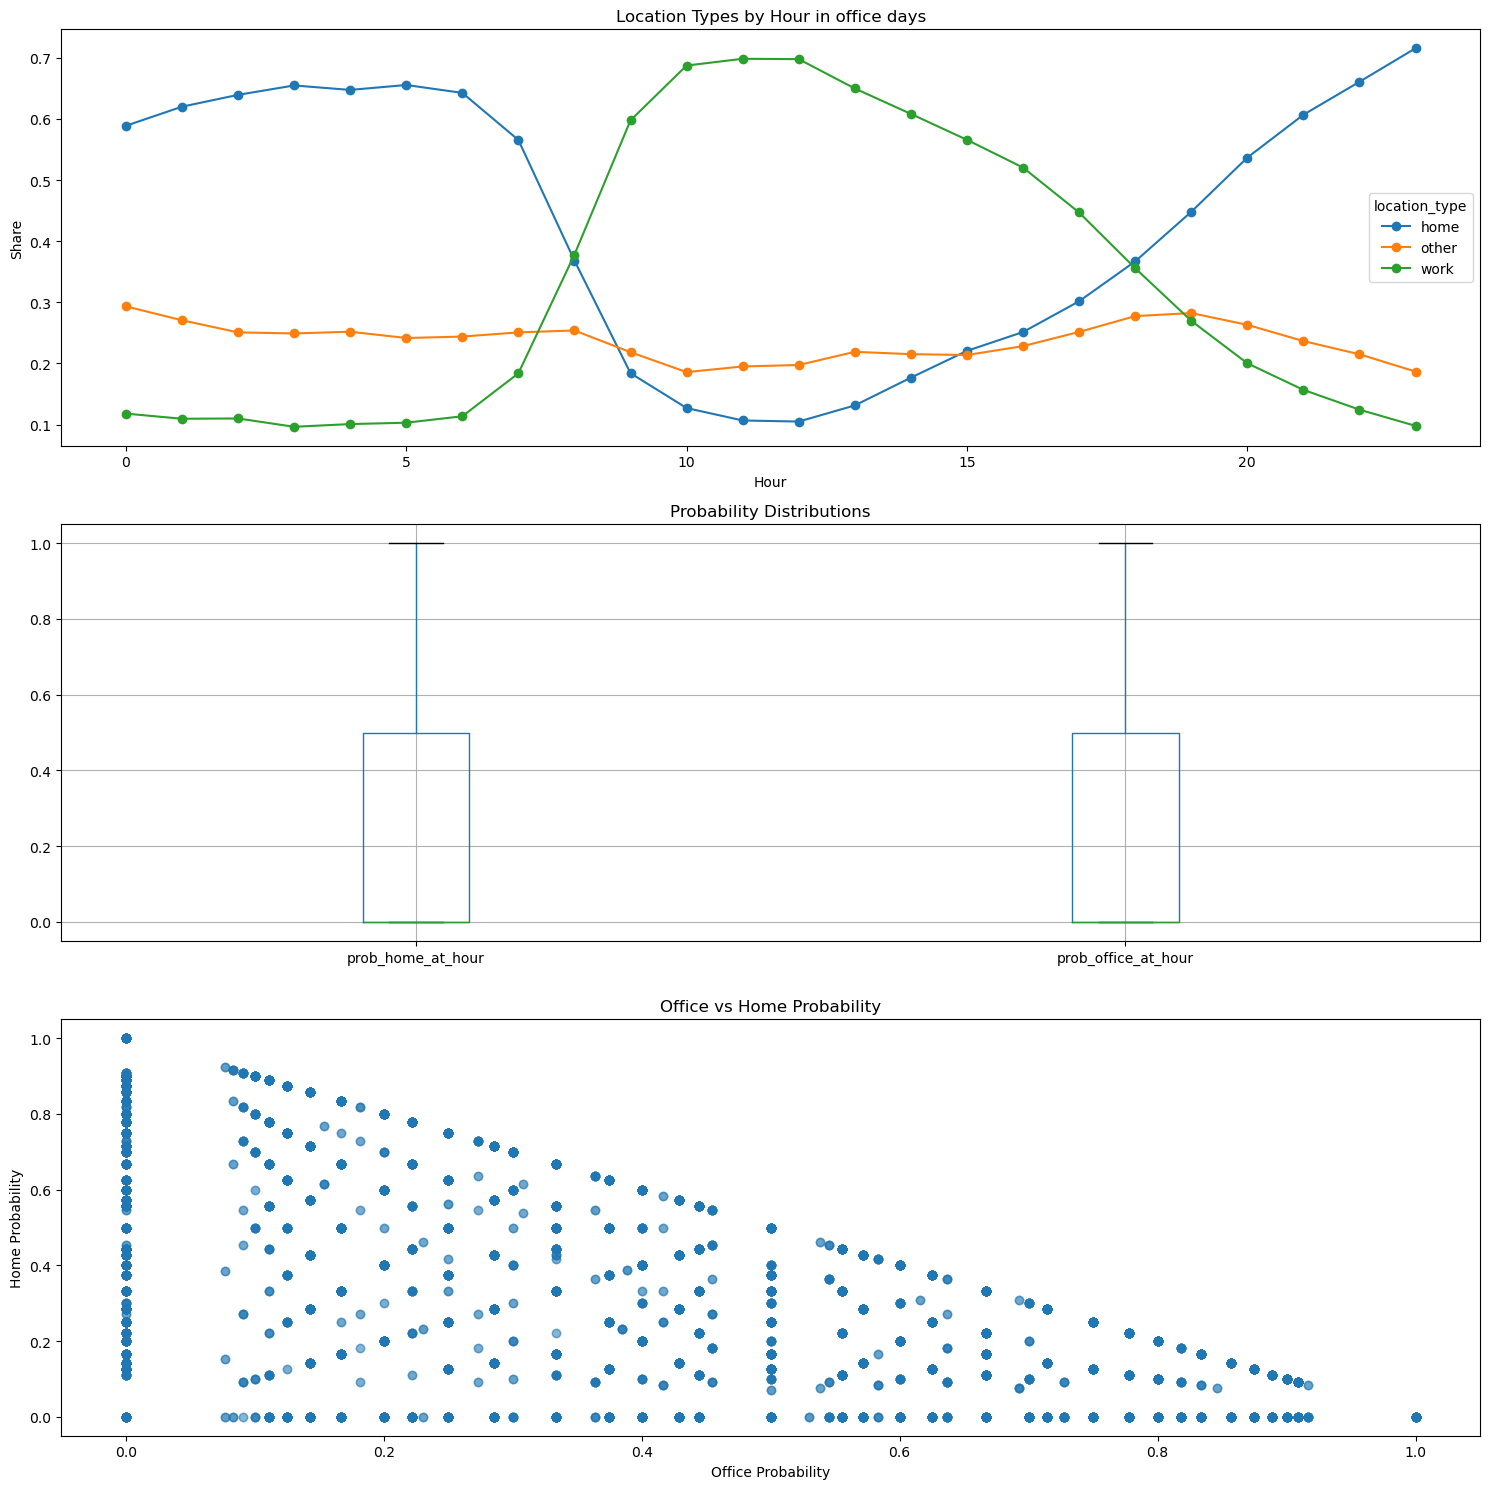


5. Data quality checks:

Probability sum > 1:
0.03839571448823592

Zero probability observations:
Home == 0: 0.6824493135710208
Office == 0: 0.6987684759600277

6. User-level statistics:
       prob_home_at_hour  prob_office_at_hour    office_day  \
count       25250.000000         25250.000000  25250.000000   
mean            0.209254             0.262686      0.402987   
std             0.166050             0.130311      0.183326   
min             0.000000             0.000000      0.029412   
25%             0.000000             0.166667      0.260000   
50%             0.217105             0.245283      0.380000   
75%             0.333333             0.339286      0.527027   
max             0.771228             0.888889      1.000000   

       share_home_location  
count         25250.000000  
mean              0.471897  
std               0.171561  
min               0.037037  
25%               0.347368  
50%               0.474684  
75%               0.596774  
max         

In [46]:
def analyze_month_patterns(month: str):
    """
    Analyze patterns in a given month's data to diagnose remote work calculation issues.
    """
    # Load data
    df_hours = pd.read_csv(
        utils.get_path("processed", "dwells", f"remote_work/hours_{month}.csv")
    )

    print(f"\nAnalysis for {month}:")

    # 1. Basic statistics
    print("\n1. Basic counts:")
    print("Total observations:", len(df_hours))
    print("Unique users:", df_hours.identifier.nunique())
    print("\nOffice day distribution:")
    print(df_hours["office_day"].value_counts(normalize=True))

    # 2. Location type distribution
    print("\n2. Location type distribution:")
    print(df_hours["location_type"].value_counts(normalize=True))

    # 3. Probability distributions
    print("\n3. Average probabilities:")
    for col in ["prob_home_at_hour", "prob_office_at_hour"]:
        print(f"\n{col}:")
        print(df_hours[col].describe())

    # 4. Visualizations
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))

    # 4.1 Hour distribution

    df_hours[df_hours["office_day"]].groupby("hour")["location_type"].value_counts(
        normalize="hour"
    ).unstack().plot(kind="line", marker="o", ax=axs[0])
    axs[0].set_title("Location Types by Hour in office days")
    axs[0].set_xlabel("Hour")
    axs[0].set_ylabel("Share")

    # 4.2 Probability distributions
    df_hours[["prob_home_at_hour", "prob_office_at_hour"]].boxplot(ax=axs[1])
    axs[1].set_title("Probability Distributions")

    # 4.3 Office vs Home probability scatter
    axs[2].scatter(
        df_hours["prob_office_at_hour"], df_hours["prob_home_at_hour"], alpha=0.1
    )
    axs[2].set_xlabel("Office Probability")
    axs[2].set_ylabel("Home Probability")
    axs[2].set_title("Office vs Home Probability")

    plt.tight_layout()
    plt.show()

    # 5. Check for potential data quality issues
    print("\n5. Data quality checks:")
    print("\nProbability sum > 1:")
    prob_sum = df_hours["prob_home_at_hour"] + df_hours["prob_office_at_hour"]
    print((prob_sum > 1).mean())

    print("\nZero probability observations:")
    print("Home == 0:", (df_hours["prob_home_at_hour"] == 0).mean())
    print("Office == 0:", (df_hours["prob_office_at_hour"] == 0).mean())

    # 6. User-level statistics
    user_stats = (
        df_hours.groupby("identifier")
        .agg(
            {
                "prob_home_at_hour": "mean",
                "prob_office_at_hour": "mean",
                "office_day": "mean",
                "location_type": lambda x: (x == "home").mean(),
            }
        )
        .rename(columns={"location_type": "share_home_location"})
    )

    print("\n6. User-level statistics:")
    print(user_stats.describe())


# Compare January 2019 with a reference month (e.g., September 2023)
analyze_month_patterns("201901")
analyze_month_patterns("202309")

In [43]:
import gc

gc.collect()

31380

<Figure size 2000x600 with 0 Axes>

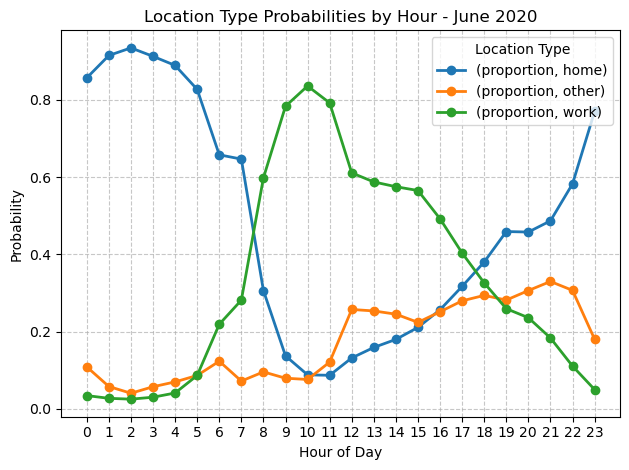

KeyError: 'work'

In [32]:
# Process January 2019
# df_201901 = load_hours_data("201901")
# prob_201901 = calculate_location_probabilities(df_201901)
# plot_location_probabilities(prob_201901, "January 2019")
# df_201901 = calculate_remote_work_metrics(df_201901, prob_201901)
# calculate_remote_work_share(df_201901)
# analyze_remote_work_metrics(df_201901, "January 2019")
# # Process September 2023
# df_202004 = load_hours_data("202004")
# prob_202004 = calculate_location_probabilities(df_202004)
# plot_location_probabilities(prob_202004, "April 2020")
# df_202004 = calculate_remote_work_metrics(df_202004, prob_202004)
# calculate_remote_work_share(df_202004)
# analyze_remote_work_metrics(df_202004, "April 2020")

# df_202006 = load_hours_data("202006")
prob_202006 = calculate_location_probabilities(df_202006)
plot_location_probabilities(prob_202006, "June 2020")
df_202006 = calculate_remote_work_metrics(df_202006, prob_202006)
calculate_remote_work_share(df_202006)
analyze_remote_work_metrics(df_202006, "April 2020")


# # Process September 2023
# df_202309 = load_hours_data("202309")
prob_202309 = calculate_location_probabilities(df_202309)
plot_location_probabilities(prob_202309, "September 2023")
df_202309 = calculate_remote_work_metrics(df_202309, prob_202309)
calculate_remote_work_share(df_202309)
analyze_remote_work_metrics(df_202309, "September 2023")

# Compare the two months
compare_months(df_201901, df_202309, "January 2019", "September 2023")

In [80]:
 df_202309['office_day'].value_counts(normalize=True)

office_day
False    0.606906
True     0.393094
Name: proportion, dtype: float64

In [81]:
 df_201901['office_day'].value_counts(normalize=True)

office_day
False    0.619951
True     0.380049
Name: proportion, dtype: float64

In [85]:
 (df_201901.groupby("identifier")["flag_remote_work_comparison"].sum()/df_201901.groupby("identifier")["work"].sum()).mean()

np.float64(0.1263993271147327)

In [86]:
(
    df_202309.groupby("identifier")["flag_remote_work_comparison"].sum()
    / df_202309.groupby("identifier")["work"].sum()
).mean()

np.float64(0.08859319072246957)

In [87]:
df_202309.groupby("identifier")["work"].sum()

identifier
000027f7-a43c-4163-8745-d042d7c6bdae    49.769054
0000b530-a306-4e50-87bb-ef7ed0e210c0    24.345361
00068d88-055b-4f9d-9b47-c77f6fb49ff1    25.030211
000a912c-3040-48f5-9fd1-2dfc2c66e893    21.305611
000b01b4-5a6d-4546-b792-5bb9c2bae1f0    21.444662
                                          ...    
fff3bf56-7c8d-4f57-98a5-6475cecbe26a    33.855931
fff6c9a6-265b-48d9-9016-0193683a6f97    16.071112
fffd4c0b-ce86-494c-8215-25e39cf91a39    29.547831
fffe70af-3bc6-4114-af17-3d272e6521a8     6.911319
fffff44b-dea4-4bbf-a851-d43b53fba974    60.954718
Name: work, Length: 25250, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
# Calculate histograms and normalize by total count to get shares
counts_2019, bins_2019 = np.histogram(remote_work_share["remote_work_share"], bins=50)
counts_2023, bins_2023 = np.histogram(
    remote_work_share_23["remote_work_share"], bins=50
)
shares_2019 = counts_2019 / len(remote_work_share)
shares_2023 = counts_2023 / len(remote_work_share_23)

plt.stairs(shares_2019, bins_2019, label="2019", alpha=0.5)
plt.stairs(shares_2023, bins_2023, label="2023", alpha=0.5)
plt.xlabel("Share of Remote Work")
plt.ylabel("Share of Users")
plt.legend()
plt.title("Distribution of Remote Work Share")